# Merging Crime Data and US County Data

In [72]:
import pandas as pd

# Load datasets
crime_data = pd.read_csv("finalForm_CrimeData.csv")  # Contains cities and states
county_data = pd.read_csv("uscities.csv", dtype={'county_fips': str})  # Contains cities, states, counties, and FIPS

In [73]:
crime_data.head(5)

,commName,state,fold,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,pctUrban,medIncome,...,PopDens,PctUsePubTrans,larcPerPop,pctMinority,PctLarcPerPop,PctSingleParent,CommTransience,PctVacant,TotalHomeless,PctUnhoused
0,Berkeley Heights,NJ,1,11980,1.37,91.78,6.50,1.88,100.0,75122,...,1845.9,9.63,1132.08,8.22,9.449750,8.57,34.30,1.63,11,0.09
1,Marple Township,PA,1,23123,0.80,95.57,3.44,0.85,100.0,47917,...,2186.7,3.84,1598.78,4.43,6.914241,13.09,20.45,2.85,0,0.00
2,Tigard,OR,1,29344,0.74,94.33,3.43,2.35,100.0,35669,...,2780.9,4.37,4972.19,5.67,16.944486,21.46,52.46,4.32,16,0.05
3,Gloversville,NY,1,16656,1.70,97.35,0.50,0.70,0.0,20580,...,3217.7,3.31,4142.56,2.65,24.871278,35.98,21.47,8.81,0,0.00
4,Bemidji,MN,1,11245,0.53,89.16,1.17,0.52,0.0,17390,...,974.2,0.38,8490.87,10.84,75.507959,41.41,41.23,7.55,2,0.02


In [74]:
county_data.head(5)

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18908608,11080.3,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,11922389,3184.7,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8497759,4614.5,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6080145,4758.9,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Houston,Houston,TX,Texas,48201,Harris,29.7860,-95.3885,5970127,1384.0,shape,False,True,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925


In [75]:
# Standardize column names
crime_data['commName'] = crime_data['commName'].str.strip().str.lower()
crime_data['state'] = crime_data['state'].str.strip().str.lower()

county_data['city'] = county_data['city'].str.strip().str.lower()
county_data['county_name'] = county_data['county_name'].str.strip().str.lower()
county_data['state_id'] = county_data['state_id'].str.strip().str.lower()

In [76]:
# Merge the datasets
merged_data = pd.merge(
    crime_data,
    county_data[['city', 'state_id', 'county_name', 'county_fips']],
    left_on=['commName', 'state'],  # columns from crime data
    right_on=['city', 'state_id'],
    how='left'  # retain all rows from crime_data
)

## Merged Data Exploration

In [77]:
merged_data.shape

(2213, 74)

In [78]:
merged_data.dtypes

commName         object
state            object
fold              int64
population        int64
racepctblack    float64
                 ...   
PctUnhoused     float64
city             object
state_id         object
county_name      object
county_fips      object
Length: 74, dtype: object

In [79]:
merged_data.head(20)

,commName,state,fold,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,pctUrban,medIncome,...,PctLarcPerPop,PctSingleParent,CommTransience,PctVacant,TotalHomeless,PctUnhoused,city,state_id,county_name,county_fips
0,berkeley heights,nj,1,11980,1.37,91.78,6.50,1.88,100.00,75122,...,9.449750,8.57,34.30,1.63,11,0.09,NaN,NaN,NaN,NaN
1,marple township,pa,1,23123,0.80,95.57,3.44,0.85,100.00,47917,...,6.914241,13.09,20.45,2.85,0,0.00,NaN,NaN,NaN,NaN
2,tigard,or,1,29344,0.74,94.33,3.43,2.35,100.00,35669,...,16.944486,21.46,52.46,4.32,16,0.05,tigard,or,washington,41067
3,gloversville,ny,1,16656,1.70,97.35,0.50,0.70,0.00,20580,...,24.871278,35.98,21.47,8.81,0,0.00,gloversville,ny,fulton,36035
4,bemidji,mn,1,11245,0.53,89.16,1.17,0.52,0.00,17390,...,75.507959,41.41,41.23,7.55,2,0.02,bemidji,mn,beltrami,27007
5,springfield,mo,1,140494,2.51,95.65,0.90,0.95,100.00,21577,...,3.624098,28.06,40.92,8.19,331,0.24,springfield,mo,greene,29077
6,norwood,ma,1,28700,1.60,96.57,1.47,1.10,100.00,42805,...,3.394390,20.47,25.67,4.89,0,0.00,NaN,NaN,NaN,NaN
7,anderson,in,1,59459,14.20,84.87,0.40,0.63,100.00,23221,...,6.208968,37.44,28.63,7.78,21,0.04,anderson,in,madison,18095
8,fargo,nd,1,74111,0.35,97.11,1.25,0.73,100.00,25326,...,5.325404,20.65,44.16,4.93,140,0.19,fargo,nd,cass,38017
9,waco,tx,1,103590,23.14,67.60,0.92,16.35,100.00,17852,...,5.477006,38.35,36.01,12.43,47,0.05,waco,tx,mclennan,48309


In [80]:
merged_data['county_name'].isna().sum()

375

In [81]:
# Move column 'county_name' to the second column
column_to_move = 'county_name'
new_position = 1

# Pop the column and reinsert it at the new position
col = merged_data.pop(column_to_move)
merged_data.insert(new_position, column_to_move, col)

In [82]:
# Add leading zeros to county_fips strings that are only 4 characters long
merged_data['county_fips'] = merged_data['county_fips'].apply(lambda x: x.zfill(5) if len(str(x)) == 4 else str(x))

# Verify the changes
merged_data['county_fips'].head(20)

0       nan
1       nan
2     41067
3     36035
4     27007
5     29077
6       nan
7     18095
8     38017
9     48309
10    48181
11    06013
12    21227
13    05069
14    27015
15    27123
16      nan
17    06037
18    39049
19    48439
Name: county_fips, dtype: object

In [83]:
col_fips = merged_data.pop('county_fips')
merged_data.insert(2, 'county_fips', col_fips)

In [84]:
merged_data.head()

,commName,county_name,county_fips,state,fold,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,larcPerPop,pctMinority,PctLarcPerPop,PctSingleParent,CommTransience,PctVacant,TotalHomeless,PctUnhoused,city,state_id
0,berkeley heights,NaN,nan,nj,1,11980,1.37,91.78,6.50,1.88,...,1132.08,8.22,9.449750,8.57,34.30,1.63,11,0.09,NaN,NaN
1,marple township,NaN,nan,pa,1,23123,0.80,95.57,3.44,0.85,...,1598.78,4.43,6.914241,13.09,20.45,2.85,0,0.00,NaN,NaN
2,tigard,washington,41067,or,1,29344,0.74,94.33,3.43,2.35,...,4972.19,5.67,16.944486,21.46,52.46,4.32,16,0.05,tigard,or
3,gloversville,fulton,36035,ny,1,16656,1.70,97.35,0.50,0.70,...,4142.56,2.65,24.871278,35.98,21.47,8.81,0,0.00,gloversville,ny
4,bemidji,beltrami,27007,mn,1,11245,0.53,89.16,1.17,0.52,...,8490.87,10.84,75.507959,41.41,41.23,7.55,2,0.02,bemidji,mn


In [85]:
# Drop redundant columns after merge
merged_data = merged_data.drop(columns=['city', 'state_id'])

In [86]:
# Remove rows where 'county_name' has NaN values
merged_data = merged_data.dropna(subset=['county_name'])

In [87]:
merged_data.head(10)

,commName,county_name,county_fips,state,fold,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,PopDens,PctUsePubTrans,larcPerPop,pctMinority,PctLarcPerPop,PctSingleParent,CommTransience,PctVacant,TotalHomeless,PctUnhoused
2,tigard,washington,41067,or,1,29344,0.74,94.33,3.43,2.35,...,2780.9,4.37,4972.19,5.67,16.944486,21.46,52.46,4.32,16,0.05
3,gloversville,fulton,36035,ny,1,16656,1.70,97.35,0.50,0.70,...,3217.7,3.31,4142.56,2.65,24.871278,35.98,21.47,8.81,0,0.00
4,bemidji,beltrami,27007,mn,1,11245,0.53,89.16,1.17,0.52,...,974.2,0.38,8490.87,10.84,75.507959,41.41,41.23,7.55,2,0.02
5,springfield,greene,29077,mo,1,140494,2.51,95.65,0.90,0.95,...,1995.7,0.97,5091.64,4.35,3.624098,28.06,40.92,8.19,331,0.24
7,anderson,madison,18095,in,1,59459,14.20,84.87,0.40,0.63,...,1515.3,0.70,3691.79,15.13,6.208968,37.44,28.63,7.78,21,0.04
8,fargo,cass,38017,nd,1,74111,0.35,97.11,1.25,0.73,...,2399.3,1.41,3946.71,2.89,5.325404,20.65,44.16,4.93,140,0.19
9,waco,mclennan,48309,tx,1,103590,23.14,67.60,0.92,16.35,...,1319.3,0.76,5673.63,32.40,5.477006,38.35,36.01,12.43,47,0.05
10,sherman,grayson,48181,tx,1,31601,12.63,83.22,0.77,4.39,...,816.1,0.00,5654.80,16.78,17.894370,31.59,38.17,12.67,1,0.00
11,san pablo,contra costa,06013,ca,1,25158,21.34,49.42,17.21,26.78,...,9387.3,11.22,5404.40,50.58,21.481835,41.94,48.24,7.58,69,0.27
12,bowling green,warren,21227,ky,1,40641,12.18,86.39,1.12,0.68,...,1354.2,0.28,3895.99,13.61,9.586354,35.40,38.43,8.73,30,0.07


In [88]:
merged_data.shape

(1838, 72)

In [89]:
merged_data['county_name'].nunique()

691

In [90]:
# Group data by county name and state
unique_counties = merged_data.groupby(['state', 'county_name', 'county_fips']).size().reset_index(name='count')

print(unique_counties)

    state           county_name county_fips  count
0      ak             anchorage       02020      1
1      ak  fairbanks north star       02090      1
2      ak                juneau       02110      1
3      al               autauga       01001      1
4      al               baldwin       01003      1
..    ...                   ...         ...    ...
873    wy              campbell       56005      1
874    wy               laramie       56021      1
875    wy              sheridan       56033      1
876    wy            sweetwater       56037      2
877    wy                 uinta       56041      1

[878 rows x 4 columns]


Ok so now that we have found all of the unique county-state combinations, we see that we will have 878 counties to work with for modeling. This is less than half of the original entries in the dataset. Hopefully this can work for modeling.

## Grouping by County and Aggregating Crime Stats

In [91]:
# Group by county and aggregate crime statistics while including population
agg_data_county = (
    merged_data
    .groupby(['county_name', 'county_fips', 'state'])  # Group by county and state
    .apply(
        lambda x: pd.Series({
            'population': x['population'].sum(),
            'racepctblack': x['racepctblack'].mean(),
            'racePctWhite': x['racePctWhite'].mean(),
            'racePctAsian': x['racePctAsian'].mean(),
            'racePctHisp': x['racePctHisp'].mean(),
            'pctUrban': x['pctUrban'].mean(),
            'medIncome': x['medIncome'].median(),
            'pctWFarmSelf': x['pctWFarmSelf'].mean(),
            'pctWInvInc': x['pctWInvInc'].mean(),
            'pctWPubAsst': (x['pctWPubAsst'] * x['PctPopUnderPov']).sum() / x['PctPopUnderPov'].sum(),
            'pctWRetire': x['pctWRetire'].mean(),
            'perCapInc': x['perCapInc'].mean(),
            'PctPopUnderPov': x['PctPopUnderPov'].mean(),
            'PctNotHSGrad': x['PctNotHSGrad'].mean(),
            'PctBSorMore': x['PctBSorMore'].mean(),
            'PctUnemployed': x['PctUnemployed'].mean(),
            'PctEmploy': x['PctEmploy'].mean(),
            'PctEmplManu': x['PctEmplManu'].mean(),
            'PctEmplProfServ': x['PctEmplProfServ'].mean(),
            'PctOccupManu': x['PctOccupManu'].mean(),
            'FemalePctDiv': x['FemalePctDiv'].mean(),
            'PctFam2Par': x['PctFam2Par'].mean(),
            'PctWorkMom': x['PctWorkMom'].mean(),
            'NumKidsBornNeverMar': x['NumKidsBornNeverMar'].sum(),
            'PctKidsBornNeverMar': x['PctKidsBornNeverMar'].mean(),
            'PctImmigRec10': x['PctImmigRec10'].mean(),
            'PctRecImmig5': x['PctRecImmig5'].mean(),
            'PctRecImmig8': x['PctRecImmig8'].mean(),
            'PctNotSpeakEnglWell': x['PctNotSpeakEnglWell'].mean(),
            'PctLargHouseFam': x['PctLargHouseFam'].mean(),
            'PersPerOccupHous': x['PersPerOccupHous'].mean(),
            'PersPerRentOccHous': x['PersPerRentOccHous'].mean(),
            'PctPersDenseHous': x['PctPersDenseHous'].mean(),
            'PctHousLess3BR': x['PctHousLess3BR'].mean(),
            'MedNumBR': x['MedNumBR'].median(),
            'HousVacant': x['HousVacant'].sum(),
            'PctHousOccup': x['PctHousOccup'].mean(),
            'PctVacantBoarded': x['PctVacantBoarded'].mean(),
            'PctVacMore6Mos': x['PctVacMore6Mos'].mean(),
            'MedYrHousBuilt': x['MedYrHousBuilt'].median(),
            'PctHousNoPhone': x['PctHousNoPhone'].mean(),
            'PctWOFullPlumb': x['PctWOFullPlumb'].mean(),
            'OwnOccMedVal': x['OwnOccMedVal'].median(),
            'OwnOccQrange': x['OwnOccQrange'].mean(),
            'RentQrange': x['RentQrange'].mean(),
            'MedRent': x['MedRent'].median(),
            'MedRentPctHousInc': x['MedRentPctHousInc'].mean(),
            'MedOwnCostPctInc': x['MedOwnCostPctInc'].mean(),
            'MedOwnCostPctIncNoMtg': x['MedOwnCostPctIncNoMtg'].mean(),
            'NumInShelters': x['NumInShelters'].sum(),
            'NumStreet': x['NumStreet'].sum(),
            'PctForeignBorn': x['PctForeignBorn'].mean(),
            'PctBornSameState': x['PctBornSameState'].mean(),
            'PctSameHouse85': x['PctSameHouse85'].mean(),
            'PctSameCity85': x['PctSameCity85'].mean(),
            'PctSameState85': x['PctSameState85'].mean(),
            'LandArea': x['LandArea'].sum(),
            'PopDens': x['PopDens'].mean(),
            'PctUsePubTrans': x['PctUsePubTrans'].mean(),
            'larcPerPop': x['larcPerPop'].mean(),
        })
    )
    .reset_index()  # Convert indices back to a dataframe
)

In [92]:
agg_data_county.head(20)

,county_name,county_fips,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,larcPerPop
0,acadia,22001,la,13983.0,30.680000,68.800000,0.310000,0.420000,0.000000,13804.0,...,0.0,0.290000,93.1400,58.980000,92.190000,97.690000,4.7,2957.500000,0.980000,4726.620000
1,adams,08001,co,132489.0,1.642500,87.125000,2.067500,24.150000,74.600000,30926.0,...,0.0,4.652500,53.1025,51.372500,74.742500,89.712500,71.2,2040.925000,2.557500,4897.750000
2,adams,28001,ms,19460.0,50.340000,49.310000,0.230000,0.500000,0.000000,16769.0,...,0.0,0.380000,79.5400,61.250000,87.630000,92.110000,13.7,1422.100000,0.850000,5769.430000
3,aiken,45003,sc,35223.0,23.225000,75.585000,0.815000,0.765000,100.000000,33075.0,...,0.0,1.480000,34.1900,49.260000,72.760000,77.870000,31.1,1157.150000,0.080000,3194.260000
4,alachua,12001,fl,84770.0,21.440000,73.360000,3.940000,4.400000,100.000000,21077.0,...,7.0,8.150000,43.1600,34.000000,55.720000,81.040000,36.1,2347.400000,2.700000,6951.520000
5,alamance,37001,nc,49924.0,19.305000,79.695000,0.580000,0.760000,100.000000,25504.5,...,0.0,1.205000,77.0300,57.090000,84.575000,91.815000,28.4,1649.150000,0.205000,3737.980000
6,alameda,06001,ca,1153560.0,9.493846,69.035385,15.028462,13.083077,99.994615,46988.0,...,613.0,17.282308,49.4500,47.237692,72.817692,87.469231,301.8,4735.876923,8.760769,3735.738462
7,albany,36001,ny,117907.0,10.645000,87.115000,1.285000,1.900000,100.000000,24735.5,...,10.0,6.130000,81.5050,49.655000,77.330000,94.125000,26.1,4448.650000,9.780000,2616.820000
8,albany,56001,wy,26687.0,0.920000,93.140000,2.320000,6.660000,0.000000,19642.0,...,0.0,3.500000,40.3900,33.890000,54.090000,77.110000,11.5,2312.600000,0.300000,3016.280000
9,alcona,26001,mi,13604.0,0.770000,97.830000,0.990000,1.290000,88.610000,37771.0,...,0.0,3.340000,62.3800,53.980000,82.090000,87.160000,18.6,732.300000,0.000000,2198.200000


In [93]:
agg_data_county.shape

(878, 63)

In [94]:
agg_data_county.dtypes

county_name        object
county_fips        object
state              object
population        float64
racepctblack      float64
                   ...   
PctSameState85    float64
LandArea          float64
PopDens           float64
PctUsePubTrans    float64
larcPerPop        float64
Length: 63, dtype: object

In [95]:
agg_data_county.isna().sum()

county_name       0
county_fips       0
state             0
population        0
racepctblack      0
                 ..
PctSameState85    0
LandArea          0
PopDens           0
PctUsePubTrans    0
larcPerPop        0
Length: 63, dtype: int64

# Merging Aggregated Crime/County Data to Food Access Data

In [96]:
food_access = pd.read_csv('county_food_data.csv')

In [97]:
food_access.head()

,county_fips,CountyName,State,total_population,weighted_low_access,weighted_low_income_access
0,1001,Autauga,AL,4874.0,53.26,11.65
1,1003,Baldwin,AL,3724.0,44.20,10.30
2,1005,Barbour,AL,12959.0,21.93,6.24
3,1011,Bullock,AL,3523.0,61.96,20.86
4,1013,Butler,AL,1693.0,42.70,10.90


In [98]:
food_access.isna().sum()

county_fips                   0
CountyName                    0
State                         0
total_population              0
weighted_low_access           0
weighted_low_income_access    0
dtype: int64

In [99]:
food_access.shape

(1851, 6)

In [100]:
# fix leading zeros in 'TRACT_FIPS' and ensure it's a string
food_access['county_fips'] = food_access['county_fips'].astype(str).str.zfill(5)

In [101]:
food_access['county_fips'].head()

0    01001
1    01003
2    01005
3    01011
4    01013
Name: county_fips, dtype: object

In [102]:
df = pd.merge(agg_data_county, food_access, on='county_fips', how='left')

In [103]:
df.head(40)

,county_name,county_fips,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,pctUrban,medIncome,...,PctSameState85,LandArea,PopDens,PctUsePubTrans,larcPerPop,CountyName,State,total_population,weighted_low_access,weighted_low_income_access
0,acadia,22001,la,13983.0,30.680000,68.800000,0.310000,0.420000,0.000000,13804.0,...,97.690000,4.7,2957.500000,0.980000,4726.620000,Acadia,LA,6188.0,18.50,5.60
1,adams,08001,co,132489.0,1.642500,87.125000,2.067500,24.150000,74.600000,30926.0,...,89.712500,71.2,2040.925000,2.557500,4897.750000,Adams,CO,59872.0,61.60,5.79
2,adams,28001,ms,19460.0,50.340000,49.310000,0.230000,0.500000,0.000000,16769.0,...,92.110000,13.7,1422.100000,0.850000,5769.430000,Adams,MS,6797.0,60.85,26.85
3,aiken,45003,sc,35223.0,23.225000,75.585000,0.815000,0.765000,100.000000,33075.0,...,77.870000,31.1,1157.150000,0.080000,3194.260000,Aiken,SC,13206.0,45.89,8.67
4,alachua,12001,fl,84770.0,21.440000,73.360000,3.940000,4.400000,100.000000,21077.0,...,81.040000,36.1,2347.400000,2.700000,6951.520000,Alachua,FL,57345.0,44.76,18.71
5,alamance,37001,nc,49924.0,19.305000,79.695000,0.580000,0.760000,100.000000,25504.5,...,91.815000,28.4,1649.150000,0.205000,3737.980000,Alamance,NC,15145.0,61.16,11.41
6,alameda,06001,ca,1153560.0,9.493846,69.035385,15.028462,13.083077,99.994615,46988.0,...,87.469231,301.8,4735.876923,8.760769,3735.738462,Alameda,CA,19160.0,84.64,14.50
7,albany,36001,ny,117907.0,10.645000,87.115000,1.285000,1.900000,100.000000,24735.5,...,94.125000,26.1,4448.650000,9.780000,2616.820000,Albany,NY,40563.0,59.50,16.85
8,albany,56001,wy,26687.0,0.920000,93.140000,2.320000,6.660000,0.000000,19642.0,...,77.110000,11.5,2312.600000,0.300000,3016.280000,Albany,WY,6688.0,93.30,20.03
9,alcona,26001,mi,13604.0,0.770000,97.830000,0.990000,1.290000,88.610000,37771.0,...,87.160000,18.6,732.300000,0.000000,2198.200000,Alcona,MI,1679.0,71.40,7.10


In [104]:
# Drop redundant columns after merge
df = df.drop(columns=['CountyName', 'State', 'total_population'])

In [105]:
df.head()

,county_name,county_fips,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,pctUrban,medIncome,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,larcPerPop,weighted_low_access,weighted_low_income_access
0,acadia,22001,la,13983.0,30.6800,68.800,0.3100,0.420,0.0,13804.0,...,93.1400,58.9800,92.1900,97.6900,4.7,2957.500,0.9800,4726.62,18.50,5.60
1,adams,08001,co,132489.0,1.6425,87.125,2.0675,24.150,74.6,30926.0,...,53.1025,51.3725,74.7425,89.7125,71.2,2040.925,2.5575,4897.75,61.60,5.79
2,adams,28001,ms,19460.0,50.3400,49.310,0.2300,0.500,0.0,16769.0,...,79.5400,61.2500,87.6300,92.1100,13.7,1422.100,0.8500,5769.43,60.85,26.85
3,aiken,45003,sc,35223.0,23.2250,75.585,0.8150,0.765,100.0,33075.0,...,34.1900,49.2600,72.7600,77.8700,31.1,1157.150,0.0800,3194.26,45.89,8.67
4,alachua,12001,fl,84770.0,21.4400,73.360,3.9400,4.400,100.0,21077.0,...,43.1600,34.0000,55.7200,81.0400,36.1,2347.400,2.7000,6951.52,44.76,18.71


In [106]:
df.shape

(878, 65)

In [107]:
df.isna().sum()

county_name                     0
county_fips                     0
state                           0
population                      0
racepctblack                    0
                             ... 
PopDens                         0
PctUsePubTrans                  0
larcPerPop                      0
weighted_low_access           184
weighted_low_income_access    184
Length: 65, dtype: int64

Ok it seems like some of the food_access dataset could not find the FIPS values for 184 rows. Lets try to impute the data using similar counties with similar statistics in order to calculate the food access with as little bias as possible.

## Dealing with Missing Food Access Statistics

In [108]:
missing_rows = df[df['weighted_low_access'].isnull()]
print(missing_rows[['county_name', 'state', 'population', 'medIncome', 'pctUrban']])

      county_name state  population  medIncome  pctUrban
10     alexandria    va    111183.0    41472.0    100.00
16      anchorage    ak    226338.0    43946.0     97.97
21   androscoggin    me     64066.0    25772.0     98.64
26       arkansas    ar     10420.0    20618.0      0.00
28        ashland    oh     20079.0    24536.0      0.00
..            ...   ...         ...        ...       ...
859    winchester    va     21947.0    26086.0      0.00
862        winona    mn     25399.0    22497.0      0.00
864          wood    wv     44724.0    26037.0    100.00
865          wood    wi     37104.0    26265.0      0.00
867      woodward    ok     12340.0    23296.0      0.00

[184 rows x 5 columns]


OK, lets find counties with similar characteristics and caluculate the mean/median of the weighted_low_access and weighted_low_income_access

In [109]:
# Define features to match on
features_to_match = ['population', 'medIncome', 'pctUrban']

# Fill missing values based on the mean of similar counties
for col in ['weighted_low_access', 'weighted_low_income_access']:
    df[col] = df.groupby(features_to_match)[col].transform(
        lambda group: group.fillna(group.mean())
    )

In [110]:
for col in ['weighted_low_access', 'weighted_low_income_access']:
    df[col] = df.groupby('state')[col].transform(
        lambda group: group.fillna(group.mean())
    )

In [111]:
df[['weighted_low_access', 'weighted_low_income_access']].isnull().sum()

weighted_low_access           11
weighted_low_income_access    11
dtype: int64

In [112]:
missing_rows = df[df['weighted_low_access'].isnull()]
print(missing_rows[['county_name', 'state']])

                        county_name state
16                        anchorage    ak
117                         capitol    ct
259            fairbanks north star    ak
299              greater bridgeport    ct
388                          juneau    ak
458  lower connecticut river valley    ct
556                naugatuck valley    ct
571                 northwest hills    ct
725       south central connecticut    ct
726        southeastern connecticut    ct
842             western connecticut    ct


In [113]:
df.isna().sum()

county_name                    0
county_fips                    0
state                          0
population                     0
racepctblack                   0
                              ..
PopDens                        0
PctUsePubTrans                 0
larcPerPop                     0
weighted_low_access           11
weighted_low_income_access    11
Length: 65, dtype: int64

In [114]:
df = df.dropna()

In [115]:
df.isna().sum()

county_name                   0
county_fips                   0
state                         0
population                    0
racepctblack                  0
                             ..
PopDens                       0
PctUsePubTrans                0
larcPerPop                    0
weighted_low_access           0
weighted_low_income_access    0
Length: 65, dtype: int64

In [116]:
df.shape

(867, 65)

In [117]:
df.columns

Index(['county_name', 'county_fips', 'state', 'population', 'racepctblack',
       'racePctWhite', 'racePctAsian', 'racePctHisp', 'pctUrban', 'medIncome',
       'pctWFarmSelf', 'pctWInvInc', 'pctWPubAsst', 'pctWRetire', 'perCapInc',
       'PctPopUnderPov', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'FemalePctDiv', 'PctFam2Par', 'PctWorkMom', 'NumKidsBornNeverMar',
       'PctKidsBornNeverMar', 'PctImmigRec10', 'PctRecImmig5', 'PctRecImmig8',
       'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PersPerOccupHous',
       'PersPerRentOccHous', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccMedVal',
       'OwnOccQrange', 'RentQrange', 'MedRent', 'MedRentPctHousInc',
       'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters',
       'NumStreet', 'PctForeignB

## Creating Community Indicators on Agg&Merged Data

### pctMinority

In [121]:
import seaborn as sns

In [122]:
# Create the pctMinority variable
df['pctMinority'] = 100 - df['racePctWhite']

<Axes: xlabel='pctMinority'>

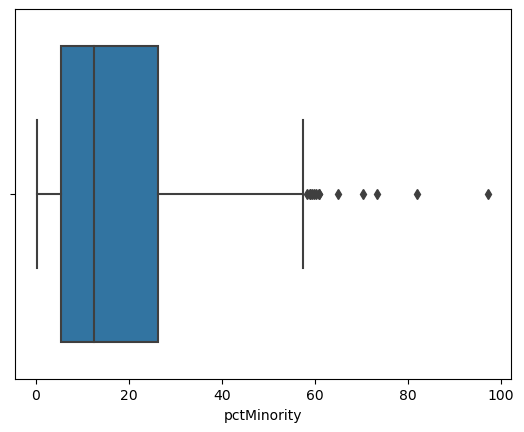

In [123]:
sns.boxplot(data=df, x="pctMinority")

### pctLarcPerPop

In [124]:
df['PctLarcPerPop'] = (df['larcPerPop'] / df['population']) * 100 #Creates a new column that divides larcPerPop by Population

<Axes: xlabel='PctLarcPerPop'>

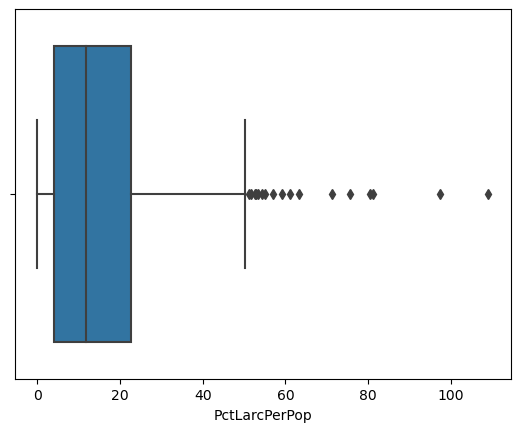

In [125]:
sns.boxplot(data=df, x="PctLarcPerPop")

### PctSinglePar

In [126]:
df['PctSingleParent'] = 100 - df['PctFam2Par'] # subtracts the amount of 2 parent households from the whole, leaving the percent of single parent household

<Axes: xlabel='PctSingleParent'>

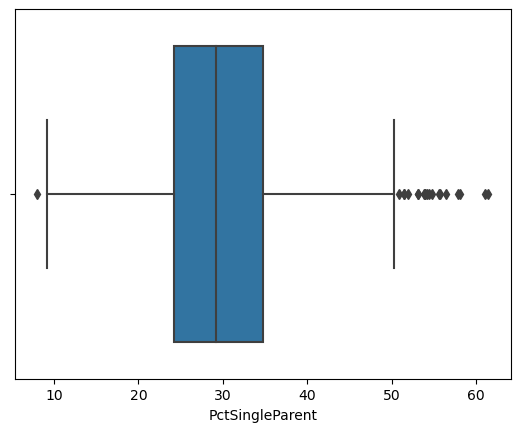

In [127]:
sns.boxplot(data=df, x="PctSingleParent")

### FemalePctDiv

In [128]:
df['FemalePctDiv']

0      14.480000
1      15.722500
2      14.890000
3      13.680000
4      12.540000
         ...    
873    14.766667
874    11.896667
875    10.365000
876    12.610000
877    19.780000
Name: FemalePctDiv, Length: 867, dtype: float64

<Axes: xlabel='FemalePctDiv'>

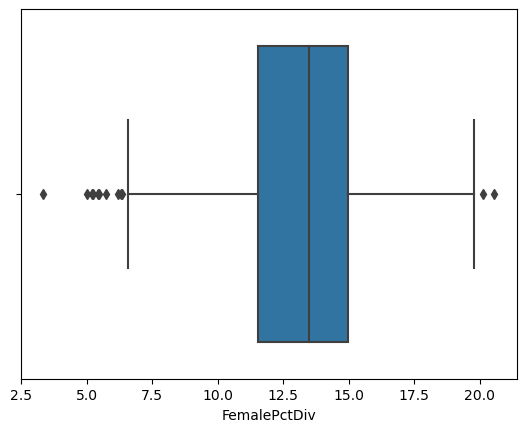

In [129]:
sns.boxplot(data=df, x="FemalePctDiv")

### PctVacant

In [130]:
df['PctVacant'] = 100 - df['PctHousOccup']

<Axes: xlabel='PctVacant'>

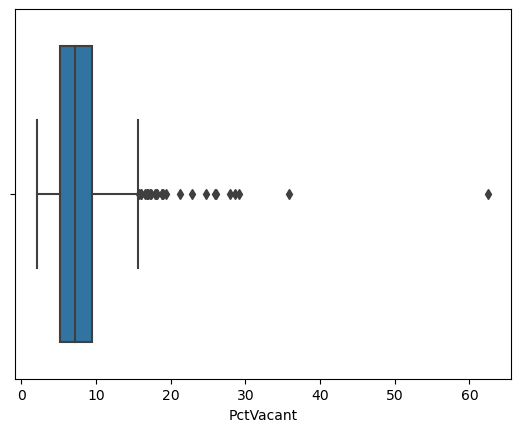

In [131]:
sns.boxplot(data=df, x="PctVacant")

### PctPersDenseHous

In [132]:
df['PctPersDenseHous']

0      6.270000
1      4.650000
2      3.710000
3      2.330000
4      4.910000
         ...   
873    8.843333
874    1.493333
875    0.630000
876    5.360000
877    5.920000
Name: PctPersDenseHous, Length: 867, dtype: float64

<Axes: xlabel='PctPersDenseHous'>

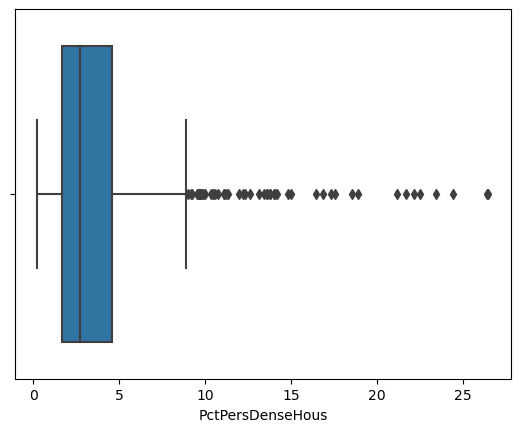

In [133]:
sns.boxplot(data=df, x="PctPersDenseHous")

### PctUnhoused

In [134]:
df['TotalHomeless'] = df['NumInShelters'] + df['NumStreet']

In [137]:
df['PctUnhoused'] = ((df['TotalHomeless'] / df['population']) * 100).round(5)

In [138]:
df['PctUnhoused']

0      0.00000
1      0.06038
2      0.00000
3      0.10788
4      0.04955
        ...   
873    0.06440
874    0.01597
875    0.00000
876    0.10326
877    2.10970
Name: PctUnhoused, Length: 867, dtype: float64

<Axes: xlabel='PctUnhoused'>

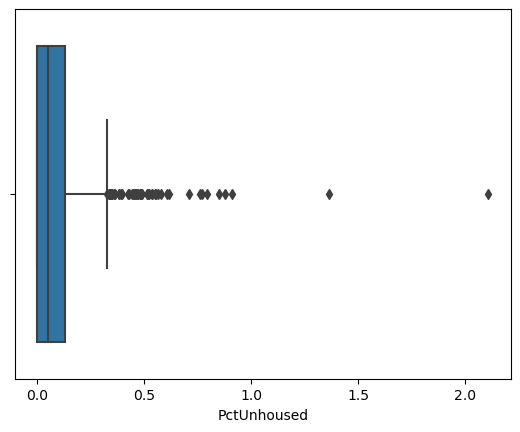

In [139]:
sns.boxplot(data=df, x="PctUnhoused")

## Creating Model Dataframe with Indicators

#### After listing all of our columns out, we can choose which ones will be represented in the model dataframe. Make sure that none of the features used for feature engineering are present alongside engineered columns, as they will bleed information into eachother and make any models obselete. 

In [140]:
df.head()

,county_name,county_fips,state,population,racepctblack,racePctWhite,racePctAsian,racePctHisp,pctUrban,medIncome,...,PctUsePubTrans,larcPerPop,weighted_low_access,weighted_low_income_access,pctMinority,PctLarcPerPop,PctSingleParent,PctVacant,TotalHomeless,PctUnhoused
0,acadia,22001,la,13983.0,30.6800,68.800,0.3100,0.420,0.0,13804.0,...,0.9800,4726.62,18.50,5.60,31.200,33.802617,39.770,11.9900,0.0,0.00000
1,adams,08001,co,132489.0,1.6425,87.125,2.0675,24.150,74.6,30926.0,...,2.5575,4897.75,61.60,5.79,12.875,3.696722,28.000,8.3425,80.0,0.06038
2,adams,28001,ms,19460.0,50.3400,49.310,0.2300,0.500,0.0,16769.0,...,0.8500,5769.43,60.85,26.85,50.690,29.647636,46.730,11.5500,0.0,0.00000
3,aiken,45003,sc,35223.0,23.2250,75.585,0.8150,0.765,100.0,33075.0,...,0.0800,3194.26,45.89,8.67,24.415,9.068677,28.735,8.5800,38.0,0.10788
4,alachua,12001,fl,84770.0,21.4400,73.360,3.9400,4.400,100.0,21077.0,...,2.7000,6951.52,44.76,18.71,26.640,8.200448,35.810,7.7600,42.0,0.04955


In [141]:
df.columns

Index(['county_name', 'county_fips', 'state', 'population', 'racepctblack',
       'racePctWhite', 'racePctAsian', 'racePctHisp', 'pctUrban', 'medIncome',
       'pctWFarmSelf', 'pctWInvInc', 'pctWPubAsst', 'pctWRetire', 'perCapInc',
       'PctPopUnderPov', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed',
       'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'FemalePctDiv', 'PctFam2Par', 'PctWorkMom', 'NumKidsBornNeverMar',
       'PctKidsBornNeverMar', 'PctImmigRec10', 'PctRecImmig5', 'PctRecImmig8',
       'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PersPerOccupHous',
       'PersPerRentOccHous', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR',
       'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccMedVal',
       'OwnOccQrange', 'RentQrange', 'MedRent', 'MedRentPctHousInc',
       'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters',
       'NumStreet', 'PctForeignB

### Without Food Access

In [142]:
model_df = df[['medIncome', 'pctWPubAsst', 'PctPopUnderPov',
                       'PctUnemployed', 'FemalePctDiv', 'PctPersDenseHous',
                       'PctVacantBoarded', 'PctHousNoPhone', 'MedRent',
                       'PctUsePubTrans', 'pctMinority', 'PctLarcPerPop',
                       'PctVacant', 'PctSingleParent', 'PctUnhoused']]

In [143]:
model_df.head(10)

,medIncome,pctWPubAsst,PctPopUnderPov,PctUnemployed,FemalePctDiv,PctPersDenseHous,PctVacantBoarded,PctHousNoPhone,MedRent,PctUsePubTrans,pctMinority,PctLarcPerPop,PctVacant,PctSingleParent,PctUnhoused
0,13804.0,18.710000,34.580000,11.140000,14.480000,6.270000,3.740000,13.300000,244.0,0.980000,31.200000,33.802617,11.990000,39.770000,0.00000
1,30926.0,9.900147,12.075000,7.072500,15.722500,4.650000,1.802500,5.047500,426.5,2.557500,12.875000,3.696722,8.342500,28.000000,0.06038
2,16769.0,15.810000,31.790000,12.380000,14.890000,3.710000,4.000000,8.540000,277.0,0.850000,50.690000,29.647636,11.550000,46.730000,0.00000
3,33075.0,6.774145,12.485000,4.290000,13.680000,2.330000,2.815000,4.695000,420.0,0.080000,24.415000,9.068677,8.580000,28.735000,0.10788
4,21077.0,6.550000,26.330000,6.590000,12.540000,4.910000,5.550000,5.890000,383.0,2.700000,26.640000,8.200448,7.760000,35.810000,0.04955
5,25504.5,5.959885,10.865000,3.305000,14.760000,1.795000,0.830000,5.220000,377.5,0.205000,20.305000,7.487341,5.535000,32.600000,0.01803
6,46988.0,8.769379,7.447692,4.557692,13.876154,6.553846,1.773846,1.283077,762.0,8.760769,30.964615,0.323844,3.940769,25.563846,0.16271
7,24735.5,8.270273,15.725000,6.600000,12.055000,1.675000,7.570000,5.845000,418.0,9.780000,12.885000,2.219393,7.725000,41.935000,0.34349
8,19642.0,4.500000,21.030000,4.790000,10.970000,3.170000,0.590000,4.330000,343.0,0.300000,6.860000,11.302432,6.100000,25.230000,0.03747
9,37771.0,2.300000,3.480000,3.600000,10.010000,1.090000,0.320000,0.310000,456.0,0.000000,2.170000,16.158483,5.560000,14.350000,0.00000


### With Food Access Added

In [144]:
model_fa = df[['medIncome', 'pctWPubAsst', 'PctPopUnderPov',
                       'PctUnemployed', 'FemalePctDiv', 'PctPersDenseHous',
                       'PctVacantBoarded', 'PctHousNoPhone', 'MedRent',
                       'PctUsePubTrans', 'pctMinority', 'PctLarcPerPop',
                       'PctVacant', 'PctSingleParent', 'PctUnhoused',
                       'weighted_low_access']]

In [145]:
model_fa.head(10)

,medIncome,pctWPubAsst,PctPopUnderPov,PctUnemployed,FemalePctDiv,PctPersDenseHous,PctVacantBoarded,PctHousNoPhone,MedRent,PctUsePubTrans,pctMinority,PctLarcPerPop,PctVacant,PctSingleParent,PctUnhoused,weighted_low_access
0,13804.0,18.710000,34.580000,11.140000,14.480000,6.270000,3.740000,13.300000,244.0,0.980000,31.200000,33.802617,11.990000,39.770000,0.00000,18.50
1,30926.0,9.900147,12.075000,7.072500,15.722500,4.650000,1.802500,5.047500,426.5,2.557500,12.875000,3.696722,8.342500,28.000000,0.06038,61.60
2,16769.0,15.810000,31.790000,12.380000,14.890000,3.710000,4.000000,8.540000,277.0,0.850000,50.690000,29.647636,11.550000,46.730000,0.00000,60.85
3,33075.0,6.774145,12.485000,4.290000,13.680000,2.330000,2.815000,4.695000,420.0,0.080000,24.415000,9.068677,8.580000,28.735000,0.10788,45.89
4,21077.0,6.550000,26.330000,6.590000,12.540000,4.910000,5.550000,5.890000,383.0,2.700000,26.640000,8.200448,7.760000,35.810000,0.04955,44.76
5,25504.5,5.959885,10.865000,3.305000,14.760000,1.795000,0.830000,5.220000,377.5,0.205000,20.305000,7.487341,5.535000,32.600000,0.01803,61.16
6,46988.0,8.769379,7.447692,4.557692,13.876154,6.553846,1.773846,1.283077,762.0,8.760769,30.964615,0.323844,3.940769,25.563846,0.16271,84.64
7,24735.5,8.270273,15.725000,6.600000,12.055000,1.675000,7.570000,5.845000,418.0,9.780000,12.885000,2.219393,7.725000,41.935000,0.34349,59.50
8,19642.0,4.500000,21.030000,4.790000,10.970000,3.170000,0.590000,4.330000,343.0,0.300000,6.860000,11.302432,6.100000,25.230000,0.03747,93.30
9,37771.0,2.300000,3.480000,3.600000,10.010000,1.090000,0.320000,0.310000,456.0,0.000000,2.170000,16.158483,5.560000,14.350000,0.00000,71.40


## Larceny Risk Classification

#### This risk factor variable is determined by the distribution of the data. 75% of the data falls below 20.24%, so anything over that will be considered High-Risk and in need of intervention. Anything below 5.90% is considered low risk and not of concern. Medium-Risk categories are communities that potentially need more interventions before they become High-Risk. This will be a categorical variable that is taken out in modeling, and used to test our model on how well it can predict the risk factor for each community, based on the features in that community. 

In [147]:
model_df['PctLarcPerPop'].describe()

count    867.000000
mean      15.450484
std       14.143237
min        0.029817
25%        4.142412
50%       11.686306
75%       22.628070
max      109.029409
Name: PctLarcPerPop, dtype: float64

### Data Without Food Access

In [149]:
# Over 20.24% larc per pop is considered high risk since 75% of data falls below
category = pd.cut(model_df.PctLarcPerPop,bins=[0,5.90,20.06,115],labels=['Low-Risk','Medium-Risk','High-Risk'])

In [150]:
model_df.insert(len(model_df.columns),'LarcRisk',category) # inserting new column into model df
model_df = model_df.drop(columns='PctLarcPerPop', axis=1) # dropping the column used to create risk column, to avoid data leakage

In [151]:
model_df.head(10)

,medIncome,pctWPubAsst,PctPopUnderPov,PctUnemployed,FemalePctDiv,PctPersDenseHous,PctVacantBoarded,PctHousNoPhone,MedRent,PctUsePubTrans,pctMinority,PctVacant,PctSingleParent,PctUnhoused,LarcRisk
0,13804.0,18.710000,34.580000,11.140000,14.480000,6.270000,3.740000,13.300000,244.0,0.980000,31.200000,11.990000,39.770000,0.00000,High-Risk
1,30926.0,9.900147,12.075000,7.072500,15.722500,4.650000,1.802500,5.047500,426.5,2.557500,12.875000,8.342500,28.000000,0.06038,Low-Risk
2,16769.0,15.810000,31.790000,12.380000,14.890000,3.710000,4.000000,8.540000,277.0,0.850000,50.690000,11.550000,46.730000,0.00000,High-Risk
3,33075.0,6.774145,12.485000,4.290000,13.680000,2.330000,2.815000,4.695000,420.0,0.080000,24.415000,8.580000,28.735000,0.10788,Medium-Risk
4,21077.0,6.550000,26.330000,6.590000,12.540000,4.910000,5.550000,5.890000,383.0,2.700000,26.640000,7.760000,35.810000,0.04955,Medium-Risk
5,25504.5,5.959885,10.865000,3.305000,14.760000,1.795000,0.830000,5.220000,377.5,0.205000,20.305000,5.535000,32.600000,0.01803,Medium-Risk
6,46988.0,8.769379,7.447692,4.557692,13.876154,6.553846,1.773846,1.283077,762.0,8.760769,30.964615,3.940769,25.563846,0.16271,Low-Risk
7,24735.5,8.270273,15.725000,6.600000,12.055000,1.675000,7.570000,5.845000,418.0,9.780000,12.885000,7.725000,41.935000,0.34349,Low-Risk
8,19642.0,4.500000,21.030000,4.790000,10.970000,3.170000,0.590000,4.330000,343.0,0.300000,6.860000,6.100000,25.230000,0.03747,Medium-Risk
9,37771.0,2.300000,3.480000,3.600000,10.010000,1.090000,0.320000,0.310000,456.0,0.000000,2.170000,5.560000,14.350000,0.00000,Medium-Risk


In [152]:
model_df['LarcRisk'].value_counts()

Medium-Risk    342
High-Risk      263
Low-Risk       262
Name: LarcRisk, dtype: int64

In [153]:
# Convert the 'LarcRisk' column to string
model_df['LarcRisk'] = model_df['LarcRisk'].astype(str)

In [154]:
model_df.dtypes

medIncome           float64
pctWPubAsst         float64
PctPopUnderPov      float64
PctUnemployed       float64
FemalePctDiv        float64
PctPersDenseHous    float64
PctVacantBoarded    float64
PctHousNoPhone      float64
MedRent             float64
PctUsePubTrans      float64
pctMinority         float64
PctVacant           float64
PctSingleParent     float64
PctUnhoused         float64
LarcRisk             object
dtype: object

In [155]:
model_df.isna().sum()

medIncome           0
pctWPubAsst         0
PctPopUnderPov      0
PctUnemployed       0
FemalePctDiv        0
PctPersDenseHous    0
PctVacantBoarded    0
PctHousNoPhone      0
MedRent             0
PctUsePubTrans      0
pctMinority         0
PctVacant           0
PctSingleParent     0
PctUnhoused         0
LarcRisk            0
dtype: int64

### Data WITH Food Access

In [156]:
model_fa['PctLarcPerPop'].describe()

count    867.000000
mean      15.450484
std       14.143237
min        0.029817
25%        4.142412
50%       11.686306
75%       22.628070
max      109.029409
Name: PctLarcPerPop, dtype: float64

In [157]:
# Over 20.24% larc per pop is considered high risk since 75% of data falls below
category = pd.cut(model_fa.PctLarcPerPop,bins=[0,5.90,20.06,115],labels=['Low-Risk','Medium-Risk','High-Risk'])

In [158]:
model_fa.insert(len(model_fa.columns),'LarcRisk',category) # inserting new column into model food access
model_fa = model_fa.drop(columns='PctLarcPerPop', axis=1) # dropping the column used to create risk column, to avoid data leakage

In [159]:
model_fa.head(10)

,medIncome,pctWPubAsst,PctPopUnderPov,PctUnemployed,FemalePctDiv,PctPersDenseHous,PctVacantBoarded,PctHousNoPhone,MedRent,PctUsePubTrans,pctMinority,PctVacant,PctSingleParent,PctUnhoused,weighted_low_access,LarcRisk
0,13804.0,18.710000,34.580000,11.140000,14.480000,6.270000,3.740000,13.300000,244.0,0.980000,31.200000,11.990000,39.770000,0.00000,18.50,High-Risk
1,30926.0,9.900147,12.075000,7.072500,15.722500,4.650000,1.802500,5.047500,426.5,2.557500,12.875000,8.342500,28.000000,0.06038,61.60,Low-Risk
2,16769.0,15.810000,31.790000,12.380000,14.890000,3.710000,4.000000,8.540000,277.0,0.850000,50.690000,11.550000,46.730000,0.00000,60.85,High-Risk
3,33075.0,6.774145,12.485000,4.290000,13.680000,2.330000,2.815000,4.695000,420.0,0.080000,24.415000,8.580000,28.735000,0.10788,45.89,Medium-Risk
4,21077.0,6.550000,26.330000,6.590000,12.540000,4.910000,5.550000,5.890000,383.0,2.700000,26.640000,7.760000,35.810000,0.04955,44.76,Medium-Risk
5,25504.5,5.959885,10.865000,3.305000,14.760000,1.795000,0.830000,5.220000,377.5,0.205000,20.305000,5.535000,32.600000,0.01803,61.16,Medium-Risk
6,46988.0,8.769379,7.447692,4.557692,13.876154,6.553846,1.773846,1.283077,762.0,8.760769,30.964615,3.940769,25.563846,0.16271,84.64,Low-Risk
7,24735.5,8.270273,15.725000,6.600000,12.055000,1.675000,7.570000,5.845000,418.0,9.780000,12.885000,7.725000,41.935000,0.34349,59.50,Low-Risk
8,19642.0,4.500000,21.030000,4.790000,10.970000,3.170000,0.590000,4.330000,343.0,0.300000,6.860000,6.100000,25.230000,0.03747,93.30,Medium-Risk
9,37771.0,2.300000,3.480000,3.600000,10.010000,1.090000,0.320000,0.310000,456.0,0.000000,2.170000,5.560000,14.350000,0.00000,71.40,Medium-Risk


In [160]:
model_fa['LarcRisk'].value_counts()

Medium-Risk    342
High-Risk      263
Low-Risk       262
Name: LarcRisk, dtype: int64

In [161]:
# Convert the 'LarcRisk' column to string
model_fa['LarcRisk'] = model_fa['LarcRisk'].astype(str)

In [162]:
model_fa.dtypes

medIncome              float64
pctWPubAsst            float64
PctPopUnderPov         float64
PctUnemployed          float64
FemalePctDiv           float64
PctPersDenseHous       float64
PctVacantBoarded       float64
PctHousNoPhone         float64
MedRent                float64
PctUsePubTrans         float64
pctMinority            float64
PctVacant              float64
PctSingleParent        float64
PctUnhoused            float64
weighted_low_access    float64
LarcRisk                object
dtype: object

In [163]:
model_fa.isna().sum()

medIncome              0
pctWPubAsst            0
PctPopUnderPov         0
PctUnemployed          0
FemalePctDiv           0
PctPersDenseHous       0
PctVacantBoarded       0
PctHousNoPhone         0
MedRent                0
PctUsePubTrans         0
pctMinority            0
PctVacant              0
PctSingleParent        0
PctUnhoused            0
weighted_low_access    0
LarcRisk               0
dtype: int64

## Splitting the Data: Test/Train

#### To avoid data leakage, splitting first ensures that there is no contamination of the test set. The test set remains a proxy for unseen data and evaluates how well your model generalizes. I also ensures reproducible results. The feature selection process reflects the variability in the training data and avoids bias from including test set information.

In [164]:
from sklearn.model_selection import train_test_split

### Data Without Food Access

In [165]:
# Split your dataset into features (X) and target (y)
X_df = model_df.drop(columns=['LarcRisk'])  # Drop target variables
y_df = model_df['LarcRisk']  # Target variable

# Perform the split
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.3, random_state=42)

In [166]:
X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape

((606, 14), (261, 14), (606,), (261,))

### Data WITH Food Access

In [167]:
# Split your dataset into features (X) and target (y)
X_fa = model_fa.drop(columns=['LarcRisk'])  # Drop target variables
y_fa = model_fa['LarcRisk']  # Target variable

# Perform the split
X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(X_fa, y_fa, test_size=0.3, random_state=42)

In [168]:
X_train_fa.shape, X_test_fa.shape, y_train_fa.shape, y_test_fa.shape

((606, 15), (261, 15), (606,), (261,))

# Modeling With & Without Food Access for Comparability

## Dummy Model (Baseline)

In [169]:
import numpy as np
from sklearn.dummy import DummyClassifier

### Control

In [170]:
dummy_clf_df = DummyClassifier(strategy="most_frequent")
dummy_clf_df.fit(X_df, y_df)

DummyClassifier(strategy='most_frequent')

In [172]:
dummy_clf_df.predict(X_df)

array(['Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Risk',
       'Medium-Risk', 'Medium-Risk', 'Medium-Risk', 'Medium-Ri

In [173]:
dummy_clf_df.score(X_df, y_df)

0.3944636678200692

### With Food Access

In [174]:
dummy_clf_fa = DummyClassifier(strategy="most_frequent")
dummy_clf_fa.fit(X_fa, y_fa)

DummyClassifier(strategy='most_frequent')

In [ ]:
dummy_clf_fa.predict(X_fa)

In [175]:
dummy_clf_fa.score(X_fa, y_fa)

0.3944636678200692

## Model 1- Decision Tree Classifier

### Control

In [176]:
from sklearn import tree

clf_df = tree.DecisionTreeClassifier() #instantiate Decision Tree class

clf_df = clf_df.fit(X_train_df, y_train_df) #fit training data to the model

In [177]:
from sklearn import metrics
import numpy as np

#predict values from X_test
predicted_df = clf_df.predict(X_test_df)

clf_df.score(X_test_df, y_test_df)

print(metrics.classification_report(y_test_df, predicted_df))

              precision    recall  f1-score   support

   High-Risk       0.44      0.47      0.46        72
    Low-Risk       0.62      0.59      0.60        82
 Medium-Risk       0.47      0.47      0.47       107

    accuracy                           0.51       261
   macro avg       0.51      0.51      0.51       261
weighted avg       0.51      0.51      0.51       261



### Control Model Improvement- GridSearch and CV

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.557661563473784
              precision    recall  f1-score   support

   High-Risk       0.54      0.53      0.53        72
    Low-Risk       0.70      0.60      0.64        82
 Medium-Risk       0.53      0.60      0.56       107

    accuracy                           0.58       261
   macro avg       0.59      0.57      0.58       261
weighted avg       0.59      0.58      0.58       261



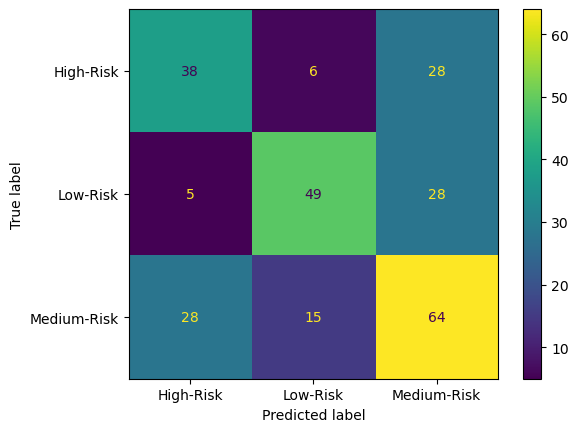

In [178]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# define parameters to cycle through
param_grid_df = {
    'criterion': ['gini', 'entropy'],  # Impurity metrics
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5]  # Minimum samples required in a leaf
}

#initialize GridSearch
grid_search_df = GridSearchCV(
    estimator=clf_df,  # Base model
    param_grid=param_grid_df,  # Grid of hyperparameters
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Verbosity (optional, for monitoring progress)
    n_jobs=-1  # Use all available CPUs
)

# fit the GridSearch to training data
grid_search_df.fit(X_train_df, y_train_df)

# Print best parameters
print("Best Parameters:", grid_search_df.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_df.best_score_)

# Evaluate performance on test data
best_clf_df = grid_search_df.best_estimator_  # Best model
y_pred_df = best_clf_df.predict(X_test_df)

# Classification report
print(metrics.classification_report(y_test_df, y_pred_df))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_clf_df, X_test_df, y_test_df)

### With Food Access

In [179]:
from sklearn import tree

clf_fa = tree.DecisionTreeClassifier() #instantiate Decision Tree class

clf_fa = clf_fa.fit(X_train_fa, y_train_fa) #fit training data to the model

In [180]:
from sklearn import metrics
import numpy as np

#predict values from X_test
predicted_fa = clf_fa.predict(X_test_fa)

clf_fa.score(X_test_fa, y_test_fa)

print(metrics.classification_report(y_test_fa, predicted_fa))

              precision    recall  f1-score   support

   High-Risk       0.40      0.47      0.43        72
    Low-Risk       0.68      0.62      0.65        82
 Medium-Risk       0.46      0.43      0.44       107

    accuracy                           0.50       261
   macro avg       0.51      0.51      0.51       261
weighted avg       0.51      0.50      0.51       261



### Food Access Model Improvement- GridSearch and CV

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.564273133721718
              precision    recall  f1-score   support

   High-Risk       0.55      0.53      0.54        72
    Low-Risk       0.68      0.61      0.64        82
 Medium-Risk       0.51      0.56      0.53       107

    accuracy                           0.57       261
   macro avg       0.58      0.57      0.57       261
weighted avg       0.57      0.57      0.57       261



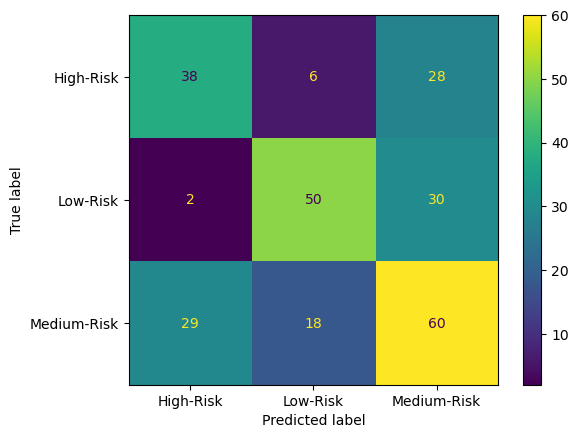

In [181]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# define parameters to cycle through
param_grid_fa = {
    'criterion': ['gini', 'entropy'],  # Impurity metrics
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5]  # Minimum samples required in a leaf
}

#initialize GridSearch
grid_search_fa = GridSearchCV(
    estimator=clf_fa,  # Base model
    param_grid=param_grid_fa,  # Grid of hyperparameters
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Verbosity (optional, for monitoring progress)
    n_jobs=-1  # Use all available CPUs
)

# fit the GridSearch to training data
grid_search_fa.fit(X_train_fa, y_train_fa)

# Print best parameters
print("Best Parameters:", grid_search_fa.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_fa.best_score_)

# Evaluate performance on test data
best_clf_fa = grid_search_fa.best_estimator_  # Best model
y_pred_fa = best_clf_fa.predict(X_test_fa)

# Classification report
print(metrics.classification_report(y_test_fa, y_pred_fa))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_clf_fa, X_test_fa, y_test_fa)

## Model 2- Decision Tree C5.0

### iterating through max_leaf_nodes and evaluating different parameters

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

### Control

In [183]:
# iterate through different max_leaf_nodes values (from 5 to 20)
best_leaf_nodes_df = None
best_accuracy_df = 0
best_model_manual_df = None

for leaf_nodes in range(5, 21): 
    # initialize and train model with current max_leaf_nodes variable
    clf50_df = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=leaf_nodes)
    clf50_df.fit(X_train_df, y_train_df)
    
    # make predictions on test set
    pred_clf50_df = clf50_df.predict(X_test_df)
    
    # calculate accuracy
    accuracy_df = accuracy_score(y_test_df, pred_clf50_df)
    
    # Update the best model if the current one has higher accuracy
    if accuracy_df > best_accuracy_df:
        best_accuracy_df = accuracy_df
        best_leaf_nodes_df = leaf_nodes
        best_model_manual_df = clf50_df  # Save the best model
        

In [184]:
# Print the best model from manual iteration
print(f"Best max_leaf_nodes from manual iteration: {best_leaf_nodes_df}")
print(f"Accuracy of best model: {best_accuracy_df:.4f}\n")
    
# Classification report for the best manual model
pred_best_manual_df = best_model_manual_df.predict(X_test_df)
print("Classification Report for Best Manual Model:\n")
print(classification_report(y_test_df, pred_best_manual_df))

Best max_leaf_nodes from manual iteration: 5
Accuracy of best model: 0.6015

Classification Report for Best Manual Model:

              precision    recall  f1-score   support

   High-Risk       0.65      0.44      0.53        72
    Low-Risk       0.67      0.66      0.66        82
 Medium-Risk       0.54      0.66      0.60       107

    accuracy                           0.60       261
   macro avg       0.62      0.59      0.60       261
weighted avg       0.61      0.60      0.60       261



### Control Model Improvement- GridSearch and CV

In [185]:
# Add GridSearchCV with Cross-Validation for further improvement
print("Performing GridSearchCV with Cross-Validation...")

# Define the parameter grid
param_grid_df = {'max_leaf_nodes': [best_leaf_nodes_df], 'criterion': ['entropy', 'gini']}

# Initialize GridSearchCV
grid_search_df = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_df,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV to the training data
grid_search_df.fit(X_train_df, y_train_df)

# Retrieve the best model and parameters
best_model_grid_df = grid_search_df.best_estimator_
best_params_df = grid_search_df.best_params_
best_score_df = grid_search_df.best_score_

# Print the best model from GridSearchCV
print("\nGridSearchCV Results:")
print(f"Best Parameters: {best_params_df}")
print(f"Best Cross-Validation Accuracy: {best_score_df:.4f}")

# Make predictions with the GridSearchCV best model
pred_best_model_df = best_model_grid_df.predict(X_test_df)

# Print classification report for GridSearchCV best model
print("\nClassification Report for GridSearchCV Best Model:")
print(classification_report(y_test_df, pred_best_model_df))

Performing GridSearchCV with Cross-Validation...
Fitting 5 folds for each of 2 candidates, totalling 10 fits

GridSearchCV Results:
Best Parameters: {'criterion': 'entropy', 'max_leaf_nodes': 5}
Best Cross-Validation Accuracy: 0.5545

Classification Report for GridSearchCV Best Model:
              precision    recall  f1-score   support

   High-Risk       0.65      0.44      0.53        72
    Low-Risk       0.67      0.66      0.66        82
 Medium-Risk       0.54      0.66      0.60       107

    accuracy                           0.60       261
   macro avg       0.62      0.59      0.60       261
weighted avg       0.61      0.60      0.60       261



### With Food Access

In [186]:
# iterate through different max_leaf_nodes values (from 5 to 20)
best_leaf_nodes_fa = None
best_accuracy_fa = 0
best_model_manual_fa = None

for leaf_nodes in range(5, 21): 
    # initialize and train model with current max_leaf_nodes variable
    clf50_fa = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=leaf_nodes)
    clf50_fa.fit(X_train_fa, y_train_fa)
    
    # make predictions on test set
    pred_clf50_fa = clf50_fa.predict(X_test_fa)
    
    # calculate accuracy
    accuracy_fa = accuracy_score(y_test_fa, pred_clf50_fa)
    
    # Update the best model if the current one has higher accuracy
    if accuracy_fa > best_accuracy_fa:
        best_accuracy_fa = accuracy_fa
        best_leaf_nodes_fa = leaf_nodes
        best_model_manual_fa = clf50_fa  # Save the best model
        

In [187]:
# Print the best model from manual iteration
print(f"Best max_leaf_nodes from manual iteration: {best_leaf_nodes_fa}")
print(f"Accuracy of best model: {best_accuracy_fa:.4f}\n")
    
# Classification report for the best manual model
pred_best_manual_fa = best_model_manual_fa.predict(X_test_fa)
print("Classification Report for Best Manual Model:\n")
print(classification_report(y_test_fa, pred_best_manual_fa))

Best max_leaf_nodes from manual iteration: 5
Accuracy of best model: 0.6015

Classification Report for Best Manual Model:

              precision    recall  f1-score   support

   High-Risk       0.65      0.44      0.53        72
    Low-Risk       0.67      0.66      0.66        82
 Medium-Risk       0.54      0.66      0.60       107

    accuracy                           0.60       261
   macro avg       0.62      0.59      0.60       261
weighted avg       0.61      0.60      0.60       261



### Food Access Model Improvment- GridSearch and CV

In [188]:
# Add GridSearchCV with Cross-Validation for further improvement
print("Performing GridSearchCV with Cross-Validation...")

# Define the parameter grid
param_grid_fa = {'max_leaf_nodes': [best_leaf_nodes_fa], 'criterion': ['entropy', 'gini']}

# Initialize GridSearchCV
grid_search_fa = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_fa,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV to the training data
grid_search_fa.fit(X_train_fa, y_train_fa)

# Retrieve the best model and parameters
best_model_grid_fa = grid_search_fa.best_estimator_
best_params_fa = grid_search_fa.best_params_
best_score_fa = grid_search_fa.best_score_

# Print the best model from GridSearchCV
print("\nGridSearchCV Results:")
print(f"Best Parameters: {best_params_fa}")
print(f"Best Cross-Validation Accuracy: {best_score_fa:.4f}")

# Make predictions with the GridSearchCV best model
pred_best_model_fa = best_model_grid_fa.predict(X_test_fa)

# Print classification report for GridSearchCV best model
print("\nClassification Report for GridSearchCV Best Model:")
print(classification_report(y_test_fa, pred_best_model_fa))

Performing GridSearchCV with Cross-Validation...
Fitting 5 folds for each of 2 candidates, totalling 10 fits

GridSearchCV Results:
Best Parameters: {'criterion': 'entropy', 'max_leaf_nodes': 5}
Best Cross-Validation Accuracy: 0.5545

Classification Report for GridSearchCV Best Model:
              precision    recall  f1-score   support

   High-Risk       0.65      0.44      0.53        72
    Low-Risk       0.67      0.66      0.66        82
 Medium-Risk       0.54      0.66      0.60       107

    accuracy                           0.60       261
   macro avg       0.62      0.59      0.60       261
weighted avg       0.61      0.60      0.60       261



## Model 3- Decision Tree CART

### Control

In [189]:
cart01_df =DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5)

In [190]:
cart01_df.fit(X_train_df, y_train_df)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)

In [191]:
pred_df =cart01_df.predict(X_test_df) 

print(classification_report(y_test_df, pred_df))

              precision    recall  f1-score   support

   High-Risk       0.65      0.44      0.53        72
    Low-Risk       0.67      0.66      0.66        82
 Medium-Risk       0.54      0.66      0.60       107

    accuracy                           0.60       261
   macro avg       0.62      0.59      0.60       261
weighted avg       0.61      0.60      0.60       261



### Control Model Improvement- GridSearch and CV

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for GridSearchCV
param_grid_df = {
    'criterion': ['entropy', 'gini'],            # Test both criteria
    'max_leaf_nodes': range(2, 21),             # Test max_leaf_nodes from 2 to 20
    'min_samples_split': [2, 5, 10],            # Minimum samples to split
    'min_samples_leaf': [1, 2, 5],              # Minimum samples in leaf
    'max_depth': [None, 5, 10, 15]              # Maximum tree depth
}

# Initialize GridSearchCV
grid_search_df = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid_df, 
    scoring='accuracy', 
    cv=5,  # 5-fold cross-validation
    verbose=1, 
    n_jobs=-1  # Use all available processors
)

# Fit GridSearchCV to the training data
grid_search_df.fit(X_train_df, y_train_df)

# Retrieve the best model and parameters
best_model_df = grid_search_df.best_estimator_
best_params_df = grid_search_df.best_params_
best_score_df = grid_search_df.best_score_

# Print the results of GridSearchCV
print("\nGridSearchCV Results:")
print(f"Best Parameters: {best_params_df}")
print(f"Best Cross-Validation Accuracy: {best_score_df:.4f}")

# Make predictions with the GridSearchCV best model
best_pred_df = best_model_df.predict(X_test_df)

# Print the classification report for the GridSearchCV best model
print("\nClassification Report for Best Model from GridSearchCV:")
print(classification_report(y_test_df, best_pred_df))

Fitting 5 folds for each of 1368 candidates, totalling 6840 fits

GridSearchCV Results:
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.5791

Classification Report for Best Model from GridSearchCV:
              precision    recall  f1-score   support

   High-Risk       0.62      0.47      0.54        72
    Low-Risk       0.70      0.62      0.66        82
 Medium-Risk       0.54      0.67      0.60       107

    accuracy                           0.60       261
   macro avg       0.62      0.59      0.60       261
weighted avg       0.61      0.60      0.60       261



### Food Access

In [193]:
cart01_fa =DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5)

In [194]:
cart01_fa.fit(X_train_fa, y_train_fa)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5)

In [195]:
pred_fa =cart01_fa.predict(X_test_fa) 

print(classification_report(y_test_fa, pred_fa))

              precision    recall  f1-score   support

   High-Risk       0.65      0.44      0.53        72
    Low-Risk       0.67      0.66      0.66        82
 Medium-Risk       0.54      0.66      0.60       107

    accuracy                           0.60       261
   macro avg       0.62      0.59      0.60       261
weighted avg       0.61      0.60      0.60       261



### Food Access Improvement

In [196]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for GridSearchCV
param_grid_fa = {
    'criterion': ['entropy', 'gini'],            # Test both criteria
    'max_leaf_nodes': range(2, 21),             # Test max_leaf_nodes from 2 to 20
    'min_samples_split': [2, 5, 10],            # Minimum samples to split
    'min_samples_leaf': [1, 2, 5],              # Minimum samples in leaf
    'max_depth': [None, 5, 10, 15]              # Maximum tree depth
}

# Initialize GridSearchCV
grid_search_fa = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), 
    param_grid=param_grid_fa, 
    scoring='accuracy', 
    cv=5,  # 5-fold cross-validation
    verbose=1, 
    n_jobs=-1  # Use all available processors
)

# Fit GridSearchCV to the training data
grid_search_fa.fit(X_train_fa, y_train_fa)

# Retrieve the best model and parameters
best_model_fa = grid_search_fa.best_estimator_
best_params_fa = grid_search_fa.best_params_
best_score_fa = grid_search_fa.best_score_

# Print the results of GridSearchCV
print("\nGridSearchCV Results:")
print(f"Best Parameters: {best_params_fa}")
print(f"Best Cross-Validation Accuracy: {best_score_fa:.4f}")

# Make predictions with the GridSearchCV best model
best_pred_fa = best_model_fa.predict(X_test_fa)

# Print the classification report for the GridSearchCV best model
print("\nClassification Report for Best Model from GridSearchCV:")
print(classification_report(y_test_fa, best_pred_fa))

Fitting 5 folds for each of 1368 candidates, totalling 6840 fits

GridSearchCV Results:
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.5807

Classification Report for Best Model from GridSearchCV:
              precision    recall  f1-score   support

   High-Risk       0.56      0.68      0.61        72
    Low-Risk       0.69      0.55      0.61        82
 Medium-Risk       0.52      0.52      0.52       107

    accuracy                           0.57       261
   macro avg       0.59      0.58      0.58       261
weighted avg       0.58      0.57      0.57       261



## Model 4- Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np

### Control

In [198]:
best_criterion_df = None
best_n_estimators_df = 1
best_accuracy_df = 0
best_auc_df = 0
best_pred_rf_df = None
best_proba_rf_df = None

# Iterate over both Gini and Entropy criteria
for criterion in ['gini', 'entropy']:
    for n_estimators in range(1, 101):
        # Initialize and train model with current criterion and n_estimators
        rf_df = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=42).fit(X_train_df, y_train_df)
        
        # Make predictions and calculate probabilities
        pred_rf_df = rf_df.predict(X_test_df)
        proba_rf_df = rf_df.predict_proba(X_test_df)
        
        # Calculate accuracy
        accuracy_rf_test_df = accuracy_score(y_test_df, pred_rf_df)
        
        # Calculate ROC-AUC (multiclass or binary)
        if len(y_test_df.unique()) > 2:  # Multiclass scenario
            auc_rf_test_df = roc_auc_score(y_test_df, proba_rf_df, multi_class='ovr')
        else:  # Binary classification
            auc_rf_test_df = roc_auc_score(y_test_df, proba_rf_df[:, 1])
        
        # Update best model if current iteration performs better
        if accuracy_rf_test_df > best_accuracy_df or auc_rf_test_df > best_auc_df:
            best_criterion_df = criterion
            best_n_estimators_df = n_estimators
            best_accuracy_df = accuracy_rf_test_df
            best_auc_df = auc_rf_test_df
            best_pred_rf_df = pred_rf_df
            best_proba_rf_df = proba_rf_df


In [199]:
# Print the results of the best model
print(f"Best Model: Criterion = {best_criterion_df}, n_estimators = {best_n_estimators_df}")
print(f"Best Accuracy: {best_accuracy_df:.4f}, Best AUC: {best_auc_df:.4f}")

# Print classification report for the best model
print("\nClassification Report for Best Model:")
print(classification_report(y_test_df, best_pred_rf_df))

Best Model: Criterion = entropy, n_estimators = 99
Best Accuracy: 0.6513, Best AUC: 0.8378

Classification Report for Best Model:
              precision    recall  f1-score   support

   High-Risk       0.63      0.61      0.62        72
    Low-Risk       0.74      0.71      0.72        82
 Medium-Risk       0.60      0.64      0.62       107

    accuracy                           0.65       261
   macro avg       0.66      0.65      0.65       261
weighted avg       0.65      0.65      0.65       261



#### Control Model Improvement- GridSearch and CV

In [200]:
# --- GridSearchCV and Cross-Validation Implementation ---
print("\nPerforming GridSearch and Cross-Validation...")

# Define the parameter grid
param_grid_df = {
    'n_estimators': range(max(1, best_n_estimators_df - 10), best_n_estimators_df + 11),  # Narrow range around best_n_estimators
    'criterion': [best_criterion_df],  # Use only the best criterion
    'max_depth': [None, 5, 10, 15, 20],  # Test different tree depths
    'min_samples_split': [2, 5, 10],  # Test varying minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Test varying minimum samples per leaf
}

# Instantiate the model with the best criterion
rf_df = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_df = GridSearchCV(
    estimator=rf_df,
    param_grid=param_grid_df,
    scoring='accuracy',  # You can also use 'roc_auc' or 'f1_weighted' based on your metric
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Perform GridSearch
grid_search_df.fit(X_train_df, y_train_df)

# Get the best model from GridSearchCV
best_model_df = grid_search_df.best_estimator_

# Cross-validation score for the best model
cv_scores_df = cross_val_score(best_model_df, X_train_df, y_train_df, cv=5, scoring='accuracy')

# Print the results
print("\nBest Parameters from GridSearch:")
print(grid_search_df.best_params_)

print("\nCross-Validation Scores for Best Model:")
print(cv_scores_df)
print(f"Mean CV Accuracy: {np.mean(cv_scores_df):.4f}")

# Evaluate the best model on the test set
best_model_pred_df = best_model_df.predict(X_test_df)
print("\nClassification Report for Best Model from GridSearch:")
print(classification_report(y_test_df, best_model_pred_df))


Performing GridSearch and Cross-Validation...
Fitting 5 folds for each of 945 candidates, totalling 4725 fits

Best Parameters from GridSearch:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 95}

Cross-Validation Scores for Best Model:
[0.6557377  0.62809917 0.66115702 0.62809917 0.65289256]
Mean CV Accuracy: 0.6452

Classification Report for Best Model from GridSearch:
              precision    recall  f1-score   support

   High-Risk       0.64      0.64      0.64        72
    Low-Risk       0.76      0.68      0.72        82
 Medium-Risk       0.58      0.63      0.60       107

    accuracy                           0.65       261
   macro avg       0.66      0.65      0.65       261
weighted avg       0.65      0.65      0.65       261



#### ROC Curve

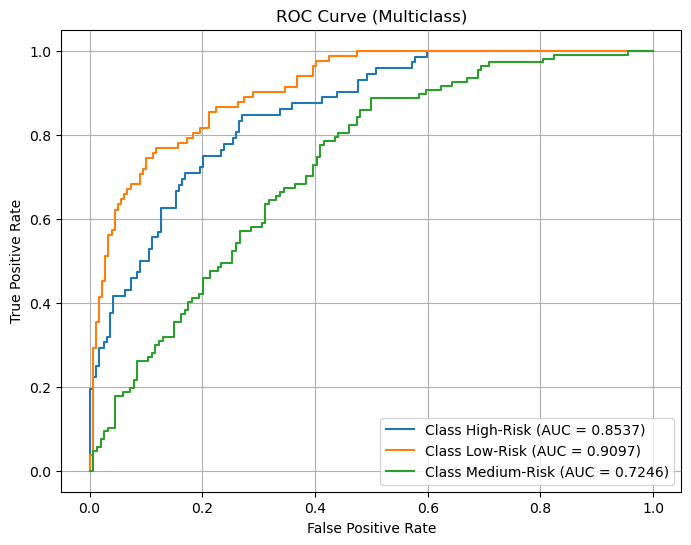

In [202]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curves for multiclass
if len(y_test_df.unique()) > 2:
    plt.figure(figsize=(8, 6))

    # Reference the best trained model
    for i, class_label in enumerate(best_model_df.classes_):
        fpr, tpr, _ = roc_curve(y_test_df == class_label, best_model_df.predict_proba(X_test_df)[:, i])
        plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc(fpr, tpr):.4f})")

    plt.title("ROC Curve (Multiclass)")

else:
    # Plot ROC curve for binary classification
    fpr, tpr, thresholds = roc_curve(y_test_df, best_model_df.predict_proba(X_test_df)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='green', label=f"ROC Curve (AUC = {best_auc:.4f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Confusion Matrix

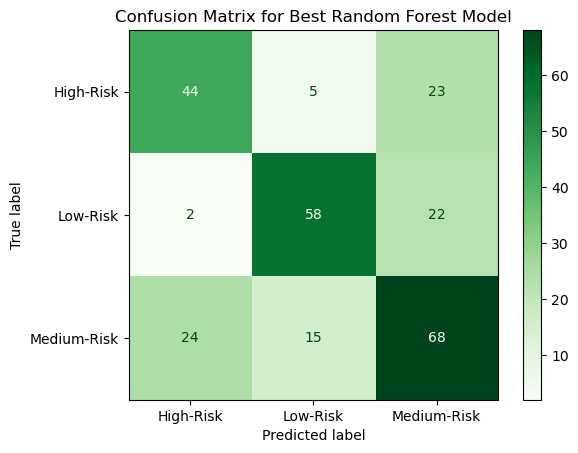

In [203]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrix for the best predictions
conf_matrix_df = confusion_matrix(y_test_df, best_pred_rf_df)

# Display the confusion matrix
disp_df = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_df, display_labels=best_model_df.classes_)
disp_df.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix for Best Random Forest Model")
plt.show()

### Food Access

In [204]:
best_criterion_fa = None
best_n_estimators_fa = 1
best_accuracy_fa = 0
best_auc_fa = 0
best_pred_rf_fa = None
best_proba_rf_fa = None

# Iterate over both Gini and Entropy criteria
for criterion in ['gini', 'entropy']:
    for n_estimators in range(1, 101):
        # Initialize and train model with current criterion and n_estimators
        rf_fa = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=42).fit(X_train_fa, y_train_fa)
        
        # Make predictions and calculate probabilities
        pred_rf_fa = rf_fa.predict(X_test_fa)
        proba_rf_fa = rf_fa.predict_proba(X_test_fa)
        
        # Calculate accuracy
        accuracy_rf_test_fa = accuracy_score(y_test_fa, pred_rf_fa)
        
        # Calculate ROC-AUC (multiclass or binary)
        if len(y_test_fa.unique()) > 2:  # Multiclass scenario
            auc_rf_test_fa = roc_auc_score(y_test_fa, proba_rf_fa, multi_class='ovr')
        else:  # Binary classification
            auc_rf_test_fa = roc_auc_score(y_test_fa, proba_rf_fa[:, 1])
        
        # Update best model if current iteration performs better
        if accuracy_rf_test_fa > best_accuracy_fa or auc_rf_test_fa > best_auc_fa:
            best_criterion_fa = criterion
            best_n_estimators_fa = n_estimators
            best_accuracy_fa = accuracy_rf_test_fa
            best_auc_fa = auc_rf_test_fa
            best_pred_rf_fa = pred_rf_fa
            best_proba_rf_fa = proba_rf_fa


In [205]:
# Print the results of the best model
print(f"Best Model: Criterion = {best_criterion_fa}, n_estimators = {best_n_estimators_fa}")
print(f"Best Accuracy: {best_accuracy_fa:.4f}, Best AUC: {best_auc_fa:.4f}")

# Print classification report for the best model
print("\nClassification Report for Best Model:")
print(classification_report(y_test_fa, best_pred_rf_fa))

Best Model: Criterion = entropy, n_estimators = 98
Best Accuracy: 0.6820, Best AUC: 0.8387

Classification Report for Best Model:
              precision    recall  f1-score   support

   High-Risk       0.69      0.64      0.66        72
    Low-Risk       0.75      0.73      0.74        82
 Medium-Risk       0.63      0.67      0.65       107

    accuracy                           0.68       261
   macro avg       0.69      0.68      0.68       261
weighted avg       0.68      0.68      0.68       261



#### Food Access Model Improvements- GridSearch and CV

In [206]:
# --- GridSearchCV and Cross-Validation Implementation ---
print("\nPerforming GridSearch and Cross-Validation...")

# Define the parameter grid
param_grid_fa = {
    'n_estimators': range(max(1, best_n_estimators_fa - 10), best_n_estimators_fa + 11),  # Narrow range around best_n_estimators
    'criterion': [best_criterion_fa],  # Use only the best criterion
    'max_depth': [None, 5, 10, 15, 20],  # Test different tree depths
    'min_samples_split': [2, 5, 10],  # Test varying minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Test varying minimum samples per leaf
}

# Instantiate the model with the best criterion
rf_fa = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_fa = GridSearchCV(
    estimator=rf_fa,
    param_grid=param_grid_fa,
    scoring='accuracy',  # You can also use 'roc_auc' or 'f1_weighted' based on your metric
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Perform GridSearch
grid_search_fa.fit(X_train_fa, y_train_fa)

# Get the best model from GridSearchCV
best_model_fa = grid_search_fa.best_estimator_

# Cross-validation score for the best model
cv_scores_fa = cross_val_score(best_model_fa, X_train_fa, y_train_fa, cv=5, scoring='accuracy')

# Print the results
print("\nBest Parameters from GridSearch:")
print(grid_search_fa.best_params_)

print("\nCross-Validation Scores for Best Model:")
print(cv_scores_fa)
print(f"Mean CV Accuracy: {np.mean(cv_scores_fa):.4f}")

# Evaluate the best model on the test set
best_model_pred_fa = best_model_fa.predict(X_test_fa)
print("\nClassification Report for Best Model from GridSearch:")
print(classification_report(y_test_fa, best_model_pred_fa))


Performing GridSearch and Cross-Validation...
Fitting 5 folds for each of 945 candidates, totalling 4725 fits

Best Parameters from GridSearch:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 102}

Cross-Validation Scores for Best Model:
[0.64754098 0.61157025 0.66115702 0.61983471 0.6446281 ]
Mean CV Accuracy: 0.6369

Classification Report for Best Model from GridSearch:
              precision    recall  f1-score   support

   High-Risk       0.66      0.60      0.63        72
    Low-Risk       0.70      0.68      0.69        82
 Medium-Risk       0.59      0.64      0.61       107

    accuracy                           0.64       261
   macro avg       0.65      0.64      0.64       261
weighted avg       0.64      0.64      0.64       261



#### ROC Curve

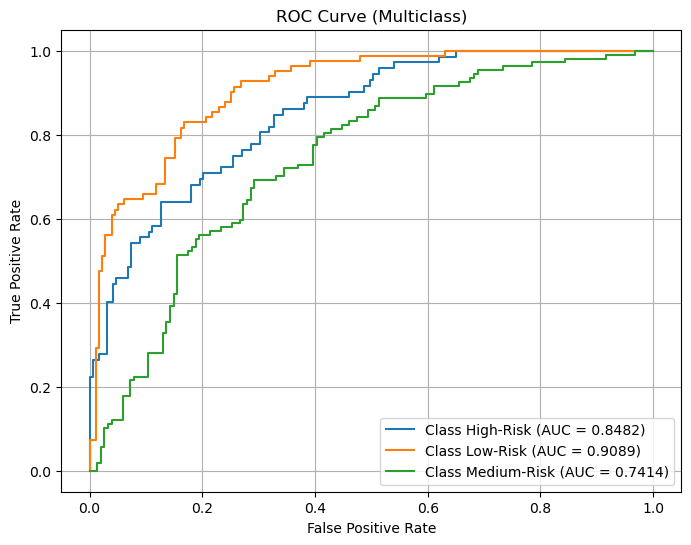

In [207]:
from sklearn.metrics import roc_curve, auc

# Plot ROC curves for multiclass
if len(y_test_fa.unique()) > 2:
    plt.figure(figsize=(8, 6))

    # Reference the best trained model
    for i, class_label in enumerate(best_model_fa.classes_):
        fpr, tpr, _ = roc_curve(y_test_fa == class_label, best_model_fa.predict_proba(X_test_fa)[:, i])
        plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc(fpr, tpr):.4f})")

    plt.title("ROC Curve (Multiclass)")

else:
    # Plot ROC curve for binary classification
    fpr, tpr, thresholds = roc_curve(y_test_fa, best_model_fa.predict_proba(X_test_fa)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='green', label=f"ROC Curve (AUC = {best_auc_fa:.4f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Confusion Matrix

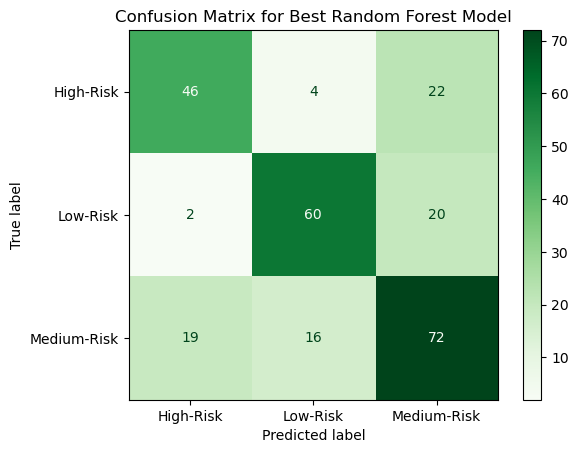

In [208]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrix for the best predictions
conf_matrix_fa = confusion_matrix(y_test_fa, best_pred_rf_fa)

# Display the confusion matrix
disp_fa = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_fa, display_labels=best_model_fa.classes_)
disp_fa.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix for Best Random Forest Model")
plt.show()

## Model 5- Gradient Boosting Classifier

In [209]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

### Control

In [210]:
# Initialize the Gradient Boosting Classifier
gb_model_df = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [211]:
# Train the model
gb_model_df.fit(X_train_df, y_train_df)

GradientBoostingClassifier(random_state=42)

In [212]:
# Make predictions
y_pred_df = gb_model_df.predict(X_test_df)

In [213]:
# If the target has more than two classes, we use the 'ovr' (one-vs-rest) approach for ROC-AUC
if len(np.unique(y_df)) > 2:
    y_pred_prob_df = gb_model_df.predict_proba(X_test_df)
    roc_auc_df = roc_auc_score(y_test_df, y_pred_prob_df, multi_class='ovr')
else:
    y_pred_prob_df = gb_model_df.predict_proba(X_test_df)[:, 1]
    roc_auc_df = roc_auc_score(y_test_df, y_pred_prob_df)

In [214]:
# Evaluate model performance
# Calculate accuracy
accuracy_df = accuracy_score(y_test_df, y_pred_df)
print(f"Accuracy: {accuracy_df:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test_df, y_pred_df))

# Calculate F1 Score
f1_df = f1_score(y_test_df, y_pred_df, average='weighted')
print(f"F1 Score (weighted): {f1_df:.2f}")

# Calculate and print ROC-AUC Score
print(f"ROC-AUC Score: {roc_auc_df:.2f}")

Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

   High-Risk       0.62      0.72      0.67        72
    Low-Risk       0.74      0.70      0.72        82
 Medium-Risk       0.60      0.56      0.58       107

    accuracy                           0.65       261
   macro avg       0.65      0.66      0.65       261
weighted avg       0.65      0.65      0.65       261

F1 Score (weighted): 0.65
ROC-AUC Score: 0.82


#### Control Improvement- GridSearch and CV

In [216]:
# --- GridSearchCV with K-Fold Cross-Validation ---
print("\nPerforming GridSearch and K-Fold Cross-Validation...")

# Define the parameter grid for GradientBoostingClassifier
param_grid_df = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up K-Fold Cross-Validation
k = 5  # 10-fold cross-validation
kf_df = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_df = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_df,
    scoring='accuracy',  # Adjust scoring metric if necessary
    cv=kf_df,
    verbose=1,
    n_jobs=-1
)

# Perform GridSearchCV
grid_search_df.fit(X_train_df, y_train_df)

# Get the best model from GridSearchCV
best_gb_model_df = grid_search_df.best_estimator_

# Evaluate the best model on the test set
best_y_pred_df = best_gb_model_df.predict(X_test_df)

# If the target has more than two classes, calculate ROC-AUC for multiclass
if len(np.unique(y_df)) > 2:
    best_y_pred_prob_df = best_gb_model_df.predict_proba(X_test_df)
    best_roc_auc_df = roc_auc_score(y_test_df, best_y_pred_prob_df, multi_class='ovr')
else:
    best_y_pred_prob_df = best_gb_model_df.predict_proba(X_test_df)[:, 1]
    best_roc_auc_df = roc_auc_score(y_test_df, best_y_pred_prob_df)

# Print best parameters and scores from GridSearch
print("\nBest Parameters from GridSearch:")
print(grid_search_df.best_params_)

print("\nEvaluation Metrics for Best Model:")
best_accuracy_df = accuracy_score(y_test_df, best_y_pred_df)
best_f1_df = f1_score(y_test_df, best_y_pred_df, average='weighted')
print(f"Accuracy: {best_accuracy_df:.2f}")
print(f"F1 Score (weighted): {best_f1_df:.2f}")
print(f"ROC-AUC Score: {best_roc_auc_df:.2f}")

# Print classification report for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test_df, best_y_pred_df))


Performing GridSearch and K-Fold Cross-Validation...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Best Parameters from GridSearch:
{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}

Evaluation Metrics for Best Model:
Accuracy: 0.63
F1 Score (weighted): 0.63
ROC-AUC Score: 0.80
Classification Report for Best Model:
              precision    recall  f1-score   support

   High-Risk       0.58      0.67      0.62        72
    Low-Risk       0.74      0.68      0.71        82
 Medium-Risk       0.60      0.57      0.58       107

    accuracy                           0.63       261
   macro avg       0.64      0.64      0.64       261
weighted avg       0.64      0.63      0.63       261



### Food Access

In [280]:
# Initialize the Gradient Boosting Classifier
gb_model_fa = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [281]:
# Train the model
gb_model_fa.fit(X_train_fa, y_train_fa)

GradientBoostingClassifier(random_state=42)

In [282]:
# Make predictions
y_pred_fa = gb_model_fa.predict(X_test_fa)

In [283]:
# If the target has more than two classes, we use the 'ovr' (one-vs-rest) approach for ROC-AUC
if len(np.unique(y_fa)) > 2:
    y_pred_prob_fa = gb_model_fa.predict_proba(X_test_fa)
    roc_auc_fa = roc_auc_score(y_test_fa, y_pred_prob_fa, multi_class='ovr')
else:
    y_pred_prob_fa = gb_model_fa.predict_proba(X_test_fa)[:, 1]
    roc_auc_fa = roc_auc_score(y_test_fa, y_pred_prob_fa)

In [284]:
# Evaluate model performance
# Calculate accuracy
accuracy_fa = accuracy_score(y_test_fa, y_pred_fa)
print(f"Accuracy: {accuracy_fa:.2f}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test_fa, y_pred_fa))

# Calculate F1 Score
f1_fa = f1_score(y_test_fa, y_pred_fa, average='weighted')
print(f"F1 Score (weighted): {f1_fa:.2f}")

# Calculate and print ROC-AUC Score
print(f"ROC-AUC Score: {roc_auc_fa:.2f}")

Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

   High-Risk       0.63      0.72      0.67        72
    Low-Risk       0.73      0.71      0.72        82
 Medium-Risk       0.61      0.56      0.58       107

    accuracy                           0.65       261
   macro avg       0.66      0.66      0.66       261
weighted avg       0.65      0.65      0.65       261

F1 Score (weighted): 0.65
ROC-AUC Score: 0.82


#### Food Access Improvment- GridSearch and CV

In [285]:
# --- GridSearchCV with K-Fold Cross-Validation ---
print("\nPerforming GridSearch and K-Fold Cross-Validation...")

# Define the parameter grid for GradientBoostingClassifier
param_grid_fa = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up K-Fold Cross-Validation
k = 5  # 5-fold cross-validation
kf_fa = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_fa = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_fa,
    scoring='accuracy',  # Adjust scoring metric if necessary
    cv=kf_fa,
    verbose=1,
    n_jobs=-1
)

# Perform GridSearchCV
grid_search_fa.fit(X_train_fa, y_train_fa)

# Get the best model from GridSearchCV
best_gb_model_fa = grid_search_fa.best_estimator_

# Evaluate the best model on the test set
best_y_pred_fa = best_gb_model_fa.predict(X_test_fa)

# If the target has more than two classes, calculate ROC-AUC for multiclass
if len(np.unique(y_fa)) > 2:
    best_y_pred_prob_fa = best_gb_model_fa.predict_proba(X_test_fa)
    best_roc_auc_fa = roc_auc_score(y_test_fa, best_y_pred_prob_fa, multi_class='ovr')
else:
    best_y_pred_prob_fa = best_gb_model_fa.predict_proba(X_test_fa)[:, 1]
    best_roc_auc_fa = roc_auc_score(y_test_fa, best_y_pred_prob_fa)

# Print best parameters and scores from GridSearch
print("\nBest Parameters from GridSearch:")
print(grid_search_fa.best_params_)

print("\nEvaluation Metrics for Best Model:")
best_accuracy_fa = accuracy_score(y_test_fa, best_y_pred_fa)
best_f1_fa = f1_score(y_test_fa, best_y_pred_fa, average='weighted')
print(f"Accuracy: {best_accuracy_fa:.2f}")
print(f"F1 Score (weighted): {best_f1_fa:.2f}")
print(f"ROC-AUC Score: {best_roc_auc_fa:.2f}")

# Print classification report for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test_fa, best_y_pred_fa))


Performing GridSearch and K-Fold Cross-Validation...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

Best Parameters from GridSearch:
{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Evaluation Metrics for Best Model:
Accuracy: 0.62
F1 Score (weighted): 0.62
ROC-AUC Score: 0.82
Classification Report for Best Model:
              precision    recall  f1-score   support

   High-Risk       0.62      0.65      0.64        72
    Low-Risk       0.68      0.66      0.67        82
 Medium-Risk       0.58      0.57      0.57       107

    accuracy                           0.62       261
   macro avg       0.63      0.63      0.63       261
weighted avg       0.62      0.62      0.62       261



## Model 6- Logistic Regression

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Control

In [223]:
# transform y using LabelEncoder
le_df = LabelEncoder()
y_train_encoded_df = le_df.fit_transform(y_train_df)
y_test_encoded_df = le_df.transform(y_test_df)

In [224]:
# scale X using StandardScaler
scaler_df = StandardScaler()
X_train_scaled_df = scaler_df.fit_transform(X_train_df)
X_test_scaled_df = scaler_df.transform(X_test_df)

In [225]:
# instantiate and train Logistic Regression model
log_reg_df = LogisticRegression()
log_reg_df.fit(X_train_scaled_df, y_train_encoded_df) # fit model to data

LogisticRegression()

In [226]:
# predict and evaluate on the test set
pred_logr_df = log_reg_df.predict(X_test_scaled_df)

In [227]:
# evaluate model
accuracy_df = accuracy_score(y_test_encoded_df, pred_logr_df)
conf_matrix_df = confusion_matrix(y_test_encoded_df, pred_logr_df)
class_report_df = classification_report(y_test_encoded_df, pred_logr_df)

In [228]:
# Print the results
print(f"Accuracy: {accuracy_df:.4f}")
print("Confusion Matrix:")
print(conf_matrix_df)
print("Classification Report:")
print(class_report_df)

Accuracy: 0.6398
Confusion Matrix:
[[45  5 22]
 [ 2 55 25]
 [26 14 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        72
           1       0.74      0.67      0.71        82
           2       0.59      0.63      0.61       107

    accuracy                           0.64       261
   macro avg       0.65      0.64      0.64       261
weighted avg       0.64      0.64      0.64       261



#### Control Improvement- GridSearchCV, L2 and L1 Regularization

In [229]:
from sklearn.model_selection import GridSearchCV

#### Lasso (L1) Regularization

In [230]:
# Lasso (L1) Regularization Tuning
lasso_param_grid_df = {'C': [0.01, 0.1, 1, 10, 100]}
lasso_model_df = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000), lasso_param_grid_df, cv=5)
lasso_model_df.fit(X_train_scaled_df, y_train_encoded_df)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [231]:
# Evaluate Lasso
print("Best Lasso Regularization Parameter (C):", lasso_model_df.best_params_['C'])
lasso_accuracy_df = lasso_model_df.best_estimator_.score(X_test_scaled_df, y_test_encoded_df)
print(f"Lasso Test Accuracy: {lasso_accuracy_df:.4f}")

Best Lasso Regularization Parameter (C): 1
Lasso Test Accuracy: 0.6092


#### Ridge (L2) Regularization

In [232]:
# Ridge (L2) Regularization Tuning
ridge_param_grid_df = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strengths
ridge_model_df = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000), ridge_param_grid_df, cv=5)
ridge_model_df.fit(X_train_scaled_df, y_train_encoded_df)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [233]:
# Evaluate Ridge
print("Best Ridge Regularization Parameter (C):", ridge_model_df.best_params_['C'])
ridge_accuracy_df = ridge_model_df.best_estimator_.score(X_test_scaled_df, y_test_encoded_df)
print(f"Ridge Test Accuracy: {ridge_accuracy_df:.4f}")

Best Ridge Regularization Parameter (C): 10
Ridge Test Accuracy: 0.6475


### Food Access

In [235]:
# transform y using LabelEncoder
le_fa = LabelEncoder()
y_train_encoded_fa = le_fa.fit_transform(y_train_fa)
y_test_encoded_fa = le_fa.transform(y_test_fa)

In [236]:
# scale X using StandardScaler
scaler_fa = StandardScaler()
X_train_scaled_fa = scaler_fa.fit_transform(X_train_fa)
X_test_scaled_fa = scaler_fa.transform(X_test_fa)

In [237]:
# instantiate and train Logistic Regression model
log_reg_fa = LogisticRegression()
log_reg_fa.fit(X_train_scaled_fa, y_train_encoded_fa) # fit model to data

LogisticRegression()

In [238]:
# predict and evaluate on the test set
pred_logr_fa = log_reg_fa.predict(X_test_scaled_fa)

In [239]:
# evaluate model
accuracy_fa = accuracy_score(y_test_encoded_fa, pred_logr_fa)
conf_matrix_fa = confusion_matrix(y_test_encoded_fa, pred_logr_fa)
class_report_fa = classification_report(y_test_encoded_fa, pred_logr_fa)

In [240]:
# Print the results
print(f"Accuracy: {accuracy_fa:.4f}")
print("Confusion Matrix:")
print(conf_matrix_fa)
print("Classification Report:")
print(class_report_fa)

Accuracy: 0.6360
Confusion Matrix:
[[45  5 22]
 [ 2 54 26]
 [26 14 67]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        72
           1       0.74      0.66      0.70        82
           2       0.58      0.63      0.60       107

    accuracy                           0.64       261
   macro avg       0.65      0.64      0.64       261
weighted avg       0.64      0.64      0.64       261



#### Food Access Improvement- GridSearchCV, L2 and L1 Regularization

In [241]:
from sklearn.model_selection import GridSearchCV

#### Lasso (L1) regularization

In [242]:
# Lasso (L1) Regularization Tuning
lasso_param_grid_fa = {'C': [0.01, 0.1, 1, 10, 100]}
lasso_model_fa = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000), lasso_param_grid_fa, cv=5)
lasso_model_fa.fit(X_train_scaled_fa, y_train_encoded_fa)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [243]:
# Evaluate Lasso
print("Best Lasso Regularization Parameter (C):", lasso_model_fa.best_params_['C'])
lasso_accuracy_fa = lasso_model_fa.best_estimator_.score(X_test_scaled_fa, y_test_encoded_fa)
print(f"Lasso Test Accuracy: {lasso_accuracy_fa:.4f}")

Best Lasso Regularization Parameter (C): 1
Lasso Test Accuracy: 0.6054


#### Ridge (L2) regularization

In [244]:
# Ridge (L2) Regularization Tuning
ridge_param_grid_fa = {'C': [0.01, 0.1, 1, 10, 100]}  # Regularization strengths
ridge_model_fa = GridSearchCV(LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000), ridge_param_grid_fa, cv=5)
ridge_model_fa.fit(X_train_scaled_fa, y_train_encoded_fa)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [245]:
# Evaluate Ridge
print("Best Ridge Regularization Parameter (C):", ridge_model_fa.best_params_['C'])
ridge_accuracy_fa = ridge_model_fa.best_estimator_.score(X_test_scaled_fa, y_test_encoded_fa)
print(f"Ridge Test Accuracy: {ridge_accuracy_fa:.4f}")

Best Ridge Regularization Parameter (C): 100
Ridge Test Accuracy: 0.6475


## Model 7- KMeans Clustering

In [246]:
import os

# Set the number of threads to 7 (or another suitable number)
os.environ["OMP_NUM_THREADS"] = '7'

In [247]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

### Control

In [248]:
# scale X for KMeans (y is not needed)
scaler_df = StandardScaler()
X_train_scaled_df = scaler_df.fit_transform(X_train_df)
X_test_scaled_df = scaler_df.transform(X_test_df)

In [249]:
# KMeans with 3 clusters
k_means_df = KMeans(n_clusters=3, n_init=10, random_state=42)
k_means_df.fit(X_train_scaled_df)

C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [250]:
# KMEans training metrics
inertia_train_df = k_means_df.inertia_
silhouette_train_df = silhouette_score(X_train_scaled_df, k_means_df.labels_)
print(f"Training Inertia: {inertia_train_df}")
print(f"Training Silhouette Score: {silhouette_train_df}")

Training Inertia: 5600.773382422692
Training Silhouette Score: 0.18225519843547297


In [251]:
# Kmeans testing metrics
k_means_df.fit(X_test_scaled_df)
inertia_test_df = k_means_df.inertia_
silhouette_test_df = silhouette_score(X_test_scaled_df, k_means_df.labels_)
print(f"Testing Inertia: {inertia_test_df}")
print(f"Testing Silhouette Score: {silhouette_test_df}")

Testing Inertia: 1907.3126346975544
Testing Silhouette Score: 0.20499586681116988


C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


#### Control Improvemnt- Cluster Tuning

In [252]:
import matplotlib.pyplot as plt

In [253]:
# Range of cluster numbers to test
cluster_range = range(2, 11)  # Try clusters from 2 to 10
inertia_scores_df = []
silhouette_scores_df = []

In [254]:
for n_clusters in cluster_range:
    kmeans_df = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans_df.fit(X_train_scaled_df)
    
    # Store metrics
    inertia_scores_df.append(kmeans_df.inertia_)
    silhouette_scores_df.append(silhouette_score(X_train_scaled_df, kmeans_df.labels_))

C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

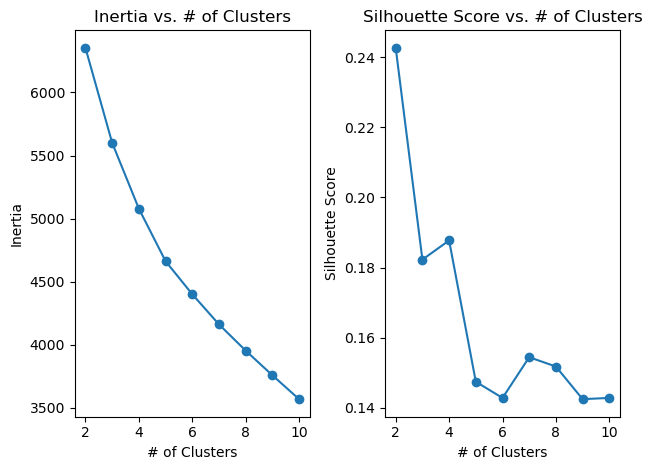

In [255]:
# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_scores_df, marker='o')
plt.title('Inertia vs. # of Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores_df, marker='o')
plt.title('Silhouette Score vs. # of Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [256]:
# Find the optimal number of clusters based on silhouette score
optimal_clusters_df = cluster_range[silhouette_scores_df.index(max(silhouette_scores_df))]
print(f"Optimal Number of Clusters: {optimal_clusters_df}")

Optimal Number of Clusters: 2


In [257]:
# Refit KMeans with optimal clusters and evaluate
kmeans_optimal_df = KMeans(n_clusters=optimal_clusters_df, n_init=10, random_state=42)
kmeans_optimal_df.fit(X_train_scaled_df)

C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2, n_init=10, random_state=42)

In [258]:
# Metrics for the optimal model
inertia_optimal_df = kmeans_optimal_df.inertia_
silhouette_optimal_df = silhouette_score(X_train_scaled_df, kmeans_optimal_df.labels_)
print(f"Optimal Model Inertia: {inertia_optimal_df}")
print(f"Optimal Model Silhouette Score: {silhouette_optimal_df}")

Optimal Model Inertia: 6353.517708963614
Optimal Model Silhouette Score: 0.24266394669013014


### Food Access

In [259]:
# scale X for KMeans (y is not needed)
scaler_fa = StandardScaler()
X_train_scaled_fa = scaler_fa.fit_transform(X_train_fa)
X_test_scaled_fa = scaler_fa.transform(X_test_fa)

In [260]:
# KMeans with 3 clusters
k_means_fa = KMeans(n_clusters=3, n_init=10, random_state=42)
k_means_fa.fit(X_train_scaled_fa)

C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [261]:
# KMEans training metrics
inertia_train_fa = k_means_fa.inertia_
silhouette_train_fa = silhouette_score(X_train_scaled_fa, k_means_fa.labels_)
print(f"Training Inertia: {inertia_train_fa}")
print(f"Training Silhouette Score: {silhouette_train_fa}")

Training Inertia: 6178.612572559551
Training Silhouette Score: 0.16795993981282495


In [262]:
# Kmeans testing metrics
k_means_fa.fit(X_test_scaled_fa)
inertia_test_fa = k_means_fa.inertia_
silhouette_test_fa = silhouette_score(X_test_scaled_fa, k_means_fa.labels_)
print(f"Testing Inertia: {inertia_test_fa}")
print(f"Testing Silhouette Score: {silhouette_test_fa}")

Testing Inertia: 2141.222085194269
Testing Silhouette Score: 0.1857282178367092


C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


#### Food Access Improvement- Cluster Tuning

In [263]:
# Range of cluster numbers to test
cluster_range = range(2, 11)  # Try clusters from 2 to 10
inertia_scores_fa = []
silhouette_scores_fa = []

In [264]:
for n_clusters in cluster_range:
    kmeans_fa = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans_fa.fit(X_train_scaled_fa)
    
    # Store metrics
    inertia_scores_fa.append(kmeans_fa.inertia_)
    silhouette_scores_fa.append(silhouette_score(X_train_scaled_fa, kmeans_fa.labels_))

C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

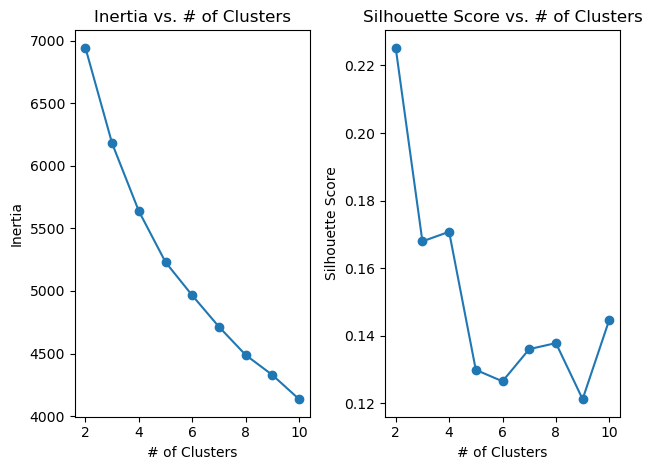

In [265]:
# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_scores_fa, marker='o')
plt.title('Inertia vs. # of Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores_fa, marker='o')
plt.title('Silhouette Score vs. # of Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [266]:
# Find the optimal number of clusters based on silhouette score
optimal_clusters_fa = cluster_range[silhouette_scores_fa.index(max(silhouette_scores_fa))]
print(f"Optimal Number of Clusters: {optimal_clusters_fa}")

Optimal Number of Clusters: 2


In [267]:
# Refit KMeans with optimal clusters and evaluate
kmeans_optimal_fa = KMeans(n_clusters=optimal_clusters_fa, n_init=10, random_state=42)
kmeans_optimal_fa.fit(X_train_scaled_fa)

C:\Users\kreda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=2, n_init=10, random_state=42)

In [268]:
# Metrics for the optimal model
inertia_optimal_fa = kmeans_optimal_fa.inertia_
silhouette_optimal_fa = silhouette_score(X_train_scaled_fa, kmeans_optimal_fa.labels_)
print(f"Optimal Model Inertia: {inertia_optimal_fa}")
print(f"Optimal Model Silhouette Score: {silhouette_optimal_fa}")

Optimal Model Inertia: 6942.518513310098
Optimal Model Silhouette Score: 0.22518803857910472


## Model 8- Naive Bayes

In [269]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder

### Control

In [270]:
# transform y using LabelEncoder
le_df = LabelEncoder()
y_train_encoded_df = le_df.fit_transform(y_train_df)
y_test_encoded_df = le_df.transform(y_test_df)

In [271]:
# instantiate and train Naive Bayes model
nb_model_df = MultinomialNB()
nb_model_df.fit(X_train_df, y_train_encoded_df)

MultinomialNB()

In [272]:
# perform Grid Search
param = {"alpha": [0.01, 0.1, 0.5, 1.0, 10.0, 100.0]}
nb_model_cv_df = GridSearchCV(MultinomialNB(), param, cv=10)
nb_model_cv_df.fit(X_train_df, y_train_encoded_df)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, 100.0]})

In [273]:
# evaluate on test set
test_accuracy_df = nb_model_cv_df.best_estimator_.score(X_test_df, y_test_encoded_df)
train_accuracy_df = nb_model_cv_df.best_estimator_.score(X_train_df, y_train_encoded_df)
print(f"Best Parameters: {nb_model_cv_df.best_params_['alpha']}")
print(f"Test Accuracy: {test_accuracy_df}")
print(f"Train Accuracy: {train_accuracy_df}")

Best Parameters: 0.01
Test Accuracy: 0.5363984674329502
Train Accuracy: 0.4900990099009901


In [274]:
# Cross-Validation Scores wiht k=5
k = 5
cross_val_df = KFold(n_splits=k, shuffle=True, random_state=42)
scores_df = cross_val_score(nb_model_df, X_train_df, y_train_encoded_df, cv=cross_val_df)
print("Naive Bayes Cross-Validation Scores:", scores_df)
print("Naive Bayes Average of All Folds:", scores_df.mean())

Naive Bayes Cross-Validation Scores: [0.42622951 0.49586777 0.47107438 0.47933884 0.52892562]
Naive Bayes Average of All Folds: 0.48028722395339385


### Food Access

In [275]:
# transform y using LabelEncoder
le_fa = LabelEncoder()
y_train_encoded_fa = le_fa.fit_transform(y_train_fa)
y_test_encoded_fa = le_fa.transform(y_test_fa)

In [276]:
# instantiate and train Naive Bayes model
nb_model_fa = MultinomialNB()
nb_model_fa.fit(X_train_fa, y_train_encoded_fa)

MultinomialNB()

In [277]:
# perform Grid Search
param = {"alpha": [0.01, 0.1, 0.5, 1.0, 10.0, 100.0]}
nb_model_cv_fa = GridSearchCV(MultinomialNB(), param, cv=10)
nb_model_cv_fa.fit(X_train_fa, y_train_encoded_fa)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, 100.0]})

In [278]:
# evaluate on test set
test_accuracy_fa = nb_model_cv_fa.best_estimator_.score(X_test_fa, y_test_encoded_fa)
train_accuracy_fa = nb_model_cv_fa.best_estimator_.score(X_train_fa, y_train_encoded_fa)
print(f"Best Parameters: {nb_model_cv_fa.best_params_['alpha']}")
print(f"Test Accuracy: {test_accuracy_fa}")
print(f"Train Accuracy: {train_accuracy_fa}")

Best Parameters: 100.0
Test Accuracy: 0.5402298850574713
Train Accuracy: 0.4801980198019802


In [279]:
# Cross-Validation Scores wiht k=5
k = 5
cross_val_fa = KFold(n_splits=k, shuffle=True, random_state=42)
scores_fa = cross_val_score(nb_model_fa, X_train_fa, y_train_encoded_fa, cv=cross_val_fa)
print("Naive Bayes Cross-Validation Scores:", scores_fa)
print("Naive Bayes Average of All Folds:", scores_fa.mean())

Naive Bayes Cross-Validation Scores: [0.45081967 0.50413223 0.44628099 0.48760331 0.51239669]
Naive Bayes Average of All Folds: 0.48024657905432866
